## Project: Mental Health in the Technology Workplace: Predictors of Mental Health Disorders

In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### This project is based on the 2016 Open Sourcing Mental Illness Mental Health in Tech Survey.
The data are freely available here: https://www.kaggle.com/osmi/mental-health-in-tech-2016

### I'm going to look at whether the following information collected in the survey can predict the status of having mental illness. 

Here are the variables that I will focus on:

1) no_employees: the number of employees in the company (categorical)

2) benefits: does the employer offer mental health benefits? (categorical)

3) wellness_program: does the employer discuss mental health as part of a wellness program? (categorical)

4) seek_help: does your employer provide resources to learn how to seek help for mental health issues? (categorical)

5) anonymity: is anonymity protected if you choose to take advantage of employer mental health resources? (categorical)

6) leave: how easy is it for you to take leave for mental health conditions? (categorical)

7) family_history: do you have a family history of mental illness? (categorical)

8) gender: including only male or female for this analysis (categorical)

9) remote: do you work more than 50% of the time remotely? (categorical)

**I will use the subjects' response to "current disorder" (Do you currently have a mental health disorder?) as the prediction outcome (categorical).** 

In [3]:
#import data
df=pd.read_csv('Mental-Health-in-Tech-Survey-2016.csv')

### Basic data exploration and cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
self_employed                         1433 non-null int64
no_employees                          1146 non-null object
tech_company                          1146 non-null float64
primary_role                          263 non-null float64
benefits                              1146 non-null object
care_options                          1013 non-null object
wellness_program                      1146 non-null object
seek_help                             1146 non-null object
anonymity                             1146 non-null object
leave                                 1146 non-null object
mental_health_consequence             1146 non-null object
phys_health_consequence               1146 non-null object
coworkers                             1146 non-null object
supervisor                            1146 non-null object
mental_vs_physical                    1146 non-null object
obs_cons

In [5]:
# number of rows (individual survey responses)
len(df.index)

1433

In the 2016 data set, there are quite a few questions that very few people answered. (primary_role is one example, with only 18.4% of people responding, which asked if the respondent's primary role was related to tech/IT.) Several comments from the 2014 data set also indicated that non-US survey respondents were dissatisfied with the survey, because they had state-provided health care as opposed to employer-provided health care, and many questions did not pertain to them. For the purposes of this project, I will restrict my analysis to individuals who identified themselves as living in the United States and provided a state of residence. 

The first task is to clean some non-sensical and out of range values in the data and deal with gender, which was a free text response where the survey respondents could enter anything. Number of employees had an error where the value ranges were autoconverted to dates, so this needed to be fixed as well. 

In [6]:
# age needs cleaning - code adapted from a Kaggle kernel
df['age']=pd.to_numeric(df['age'],errors='coerce')
def age_process(age):
    if age>=18 and age<=100:
        return age
    else:
        return np.nan
df['age']=df['age'].apply(age_process)
count_nan = len(df['age']) - df['age'].count()
print count_nan

4


In [7]:
# drop rows where age was out of range
df.dropna(subset=['age'], inplace=True) 

In [8]:
# confirm that the number of rows decreased by the expected count of 4
len(df.index)

1429

In [9]:
# gender needs cleaning - was free text entry, so includes many misspellings and rare non-binary types
# do not want to exclude non-binary, but not enough representatives to make their own categories
# so make male, female, and nonbinary
df.gender = df.gender.str.lower()
df['gender'] = df['gender'].str.replace(r"[\"\',]", '')
df.gender.unique()

array(['male', 'male ', 'female', 'm', 'i identify as female.', 'female ',
       'bigender', 'non-binary', 'female assigned at birth ', 'f', 'woman',
       'man', 'fm', 'cis female ', 'transitioned m2f',
       'genderfluid (born female)', 'other/transfeminine',
       'female or multi-gender femme', 'female/woman', 'cis male', 'male.',
       'androgynous', 'male 9:1 female roughly', nan, 'male (cis)',
       'other', 'nb masculine', 'cisgender female', 'sex is male',
       'none of your business', 'genderqueer', 'human', 'genderfluid',
       'enby', 'malr', 'genderqueer woman', 'mtf', 'queer', 'agender',
       'dude', 'fluid',
       'im a man why didnt you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take? ',
       'mail', 'm|', 'male/genderqueer', 'fem', 'nonbinary',
       'female (props for making this a freeform field though)', ' female',
       'unicorn', 'male (trans ftm)', 'cis-woman', 'cis

In [10]:
# keeping non-binary, spelling error, and other entries
# sorry this is so inelegant!
df.gender = df.gender.replace('male ', 'male')
df.gender = df.gender.replace('m', 'male')
df.gender = df.gender.replace('Male ', 'male')
df.gender = df.gender.replace('i identify as female.', 'female')
df.gender = df.gender.replace('female ', 'female')
df.gender = df.gender.replace('bigender', 'nonbinary')
df.gender = df.gender.replace('non-binary', 'nonbinary')
df.gender = df.gender.replace('female assigned at birth ', 'nonbinary')
df.gender = df.gender.replace('f', 'female')
df.gender = df.gender.replace('woman', 'female')
df.gender = df.gender.replace('man', 'male')
df.gender = df.gender.replace('fm', 'female') # ???
df.gender = df.gender.replace('cis female ', 'female')
df.gender = df.gender.replace('transitioned m2f', 'female')
df.gender = df.gender.replace('genderfluid (born female)', 'nonbinary')
df.gender = df.gender.replace('other/transfeminine', 'nonbinary')
df.gender = df.gender.replace('female or multi-gender femme', 'nonbinary')
df.gender = df.gender.replace('female/woman', 'female')
df.gender = df.gender.replace('cis male', 'male')
df.gender = df.gender.replace('male.', 'male')
df.gender = df.gender.replace('androgynous', 'nonbinary')
df.gender = df.gender.replace('male 9:1 female roughly', 'nonbinary')
df.gender = df.gender.replace('male (cis)', 'male')
df.gender = df.gender.replace('other', 'nonbinary')
df.gender = df.gender.replace('nb masculine', 'nonbinary')
df.gender = df.gender.replace('cisgender female', 'female')
df.gender = df.gender.replace('sex is male', 'male')
df.gender = df.gender.replace('none of your business', 'nonbinary')
df.gender = df.gender.replace('genderqueer', 'nonbinary')
df.gender = df.gender.replace('human', 'nonbinary')
df.gender = df.gender.replace('genderfluid', 'nonbinary')
df.gender = df.gender.replace('enby', 'nonbinary')
df.gender = df.gender.replace('malr', 'male')
df.gender = df.gender.replace('genderqueer woman', 'nonbinary')
df.gender = df.gender.replace('mtf', 'female')
df.gender = df.gender.replace('queer', 'nonbinary')
df.gender = df.gender.replace('agender', 'nonbinary')
df.gender = df.gender.replace('dude', 'male')
df.gender = df.gender.replace('fluid', 'nonbinary')
df.gender = df.gender.replace('im a man why didnt you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take? ', 'male')
df.gender = df.gender.replace('mail', 'male')
df.gender = df.gender.replace('m|', 'male')
df.gender = df.gender.replace('male/genderqueer', 'nonbinary')
df.gender = df.gender.replace('fem', 'female')
df.gender = df.gender.replace('nonbinary', 'nonbinary')
df.gender = df.gender.replace('female (props for making this a freeform field though)', 'nonbinary')
df.gender = df.gender.replace(' female', 'female')
df.gender = df.gender.replace('unicorn', 'nonbinary')
df.gender = df.gender.replace('male (trans ftm)', 'male')
df.gender = df.gender.replace('cis-woman', 'female')
df.gender = df.gender.replace('cisdude', 'male')
df.gender = df.gender.replace('genderflux demi-girl', 'nonbinary')
df.gender = df.gender.replace('female-bodied; no feelings about gender', 'nonbinary')
df.gender = df.gender.replace('cis man', 'male')
df.gender = df.gender.replace('afab', 'nonbinary')
df.gender = df.gender.replace('cis man', 'male')
df.gender = df.gender.replace('transgender woman', 'female')
df.gender.unique()

array(['male', 'female', 'nonbinary', nan], dtype=object)

In [11]:
# drop rows where gender is not given and confirm
df.dropna(subset=['gender'], inplace=True) 
len(df.index)

1426

In [12]:
# how many respondents of each gender?
df['gender'].value_counts()

male         1054
female        339
nonbinary      33
Name: gender, dtype: int64

In [13]:
# no_employees needs to be fixed - 6-25 and 1-5 were converted into dates in the original dataset
df.no_employees = df.no_employees.replace('25-Jun', '6-25')
df.no_employees = df.no_employees.replace('5-Jan', '1-5')
df.no_employees.unique()

array(['26-100', '6-25', nan, 'More than 1000', '100-500', '500-1000',
       '1-5'], dtype=object)

In [14]:
# drop rows where no_employees is not given and confirm
df.dropna(subset=['no_employees'], inplace=True) 
len(df.index)

1140

I decided to restrict my analysis to only US respondents, because many of the free comments left on the 2014 sibling survey by the same organization spoke to the lack of relevance of questions about employee-sponsored health care to people who received state-provided health care. I also decided to drop any US response that did not include state of residence, because one of the goals of the organization providing the data was to consider geographical variation. 

In [15]:
# remaining variables are all categorical (forced into categories by the survey), so no wild entries 

# get rid of any rows missing state
df.dropna(subset=['state'], inplace=True) 
len(df.index)

706

In [16]:
# check that this restricts the remaining data to US survey respondents
df.country.unique()

array(['United States of America'], dtype=object)

Although I feel very strongly that people who identify as a nonbinary gender should be included in discussions of mental health, there were so few of these people in this sample that I dropped them. I hope to come back to them in the future and conduct a separate analysis. I hypothesize that they may face overall higher discrimination in the workplace and be particularly vulnerable to mental health disorders and lack of information or access how to treat them. For now, all nonbinary individuals are dropped. 

In [17]:
# how many respondents of each gender now?
df['gender'].value_counts()

male         493
female       199
nonbinary     14
Name: gender, dtype: int64

In [18]:
# since nonbinary only represent about 2% of the data, regrettably, I am dropping them for this analysis
df=df[df.gender.str.contains("nonbinary") == False]

Likewise, several variables in the dataset had a lot of missing values, so I decided to drop columns and focus on the 9 variables described above. I hope to come back in a later analysis to look at the US and international responses to some of these issues, particularly issues of attitudes towards disclosure of mental health disorders to management and coworkers. 

In [19]:
# drop categories that are missing a significant amount of responses
df.drop(["primary_role", "coverage", "self_help", "disclose", "neg_disclose", "work_disclose", "neg_work_disclose", "productivity", "productivity_percent", "other_mhd_reveal"], axis=1, inplace=True)

# drop all "previous employer" categories - 10% did not answer or was not applicable
df.drop(["previous_employ", "previous_benefits", "previous_care_options", "previous_wellness_program", "previous_seek_help", "previous_anonymity", "previous_mental_health_consequence", "previous_phys_health_consequence", "previous_coworkers", "previous_supervisor", "previous_mental_vs_physical", "previous_obs_consequence", "previous_obs_consequence.1"], axis=1, inplace=True)

# drop remaining categories with missing data
# interview_why were free answer options for why they wouldn't disclose mental or physical conditions in job interviews
# prof conditions is largely redundant with past, current, and which disorder
# I decided to analyze by state of residence, because it was rarely different from state_work, which was missing one value
df.drop(["care_options", "phys_health_interview_why", "mental_health_interview_why", "prof_conditions", "country_work", "state_work"], axis=1, inplace=True)

# drop self_employed - these respondents tended to not answer a lot of questions, again because many questions were not relevant to them
df.drop(["self_employed"], axis=1, inplace=True)

# drop many categories that are more about attitudes and openness than health history and access
df.drop(["tech_company", "mental_health_consequence", "phys_health_consequence", "coworkers", "supervisor", "mental_health_interview", "phys_health_interview", "mental_vs_physical", "obs_consequence", "hurt_career", "negative_view", "which_disorder", "maybe_disorder", "prof_diagnosed", "position", "disclose_FandF", "past_disorder", "treatment", "work_interfere_tx", "work_interfere_notx"], axis=1, inplace=True)

# drop country because all are from the US now
df.drop(["country"], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 1 to 1431
Data columns (total 12 columns):
no_employees        692 non-null object
benefits            692 non-null object
wellness_program    692 non-null object
seek_help           692 non-null object
anonymity           692 non-null object
leave               692 non-null object
family_history      692 non-null object
current_disorder    692 non-null object
age                 692 non-null float64
gender              692 non-null object
state               692 non-null object
remote              692 non-null object
dtypes: float64(1), object(11)
memory usage: 70.3+ KB


Looking at the age distribution of the data, age is roughly normal and centered around ~30 years old. 

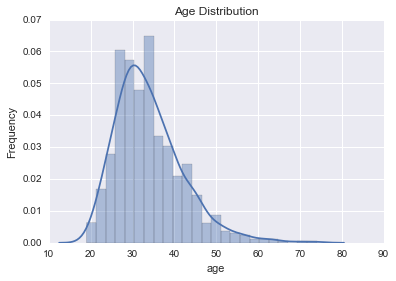

In [21]:
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.ylabel('Frequency')

Gender is unbalanced with a ratio of about 2:5 female to male. In future efforts, I could look into using the "balance" parameter in models to deal with this. 

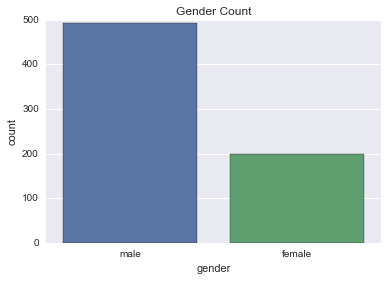

In [22]:
sns.countplot(df['gender'])
plt.title('Gender Count')

Almost all states are represented, but very unevenly. I may be able to join the 2014 and 2016 datasets to get more representatives from each state for future analysis. 

In [23]:
# Arkansas, Mississippi, Wyoming, and Hawaii are not represented. District of Columbia has 2 responses. 
# total unique states: 50-4+1 = 47
df.state.nunique()

47

In [24]:
df['state'].value_counts()

California              107
Illinois                 45
Michigan                 42
Minnesota                38
Texas                    36
Washington               34
New York                 34
Pennsylvania             29
Tennessee                27
Oregon                   25
Indiana                  21
Colorado                 21
Ohio                     21
North Carolina           20
Massachusetts            19
Florida                  17
Kansas                   14
Virginia                 14
Maryland                 13
Oklahoma                 12
Georgia                  11
Nebraska                 10
Missouri                 10
Wisconsin                 7
Utah                      6
Iowa                      5
Maine                     5
New Hampshire             5
Alabama                   4
Arizona                   4
New Jersey                4
Vermont                   3
North Dakota              3
Idaho                     3
Connecticut               3
Rhode Island        

In [25]:
df['state'].value_counts().median()

7.0

In [26]:
df['state'].value_counts().mean()

14.72340425531915

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

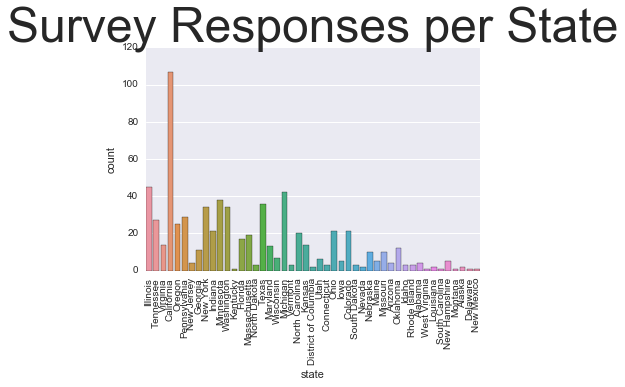

In [27]:
# California is the state that is the outlier on the high end, more than 2x as many as the next highest state
sns.countplot(df['state'])
sns.set(font_scale=4)
plt.rcParams['figure.figsize']=(30,30)
plt.title('Survey Responses per State')
plt.xticks(rotation=90)

Company size is another unbalanced variable. I will look into how to deal with this in future analyses.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

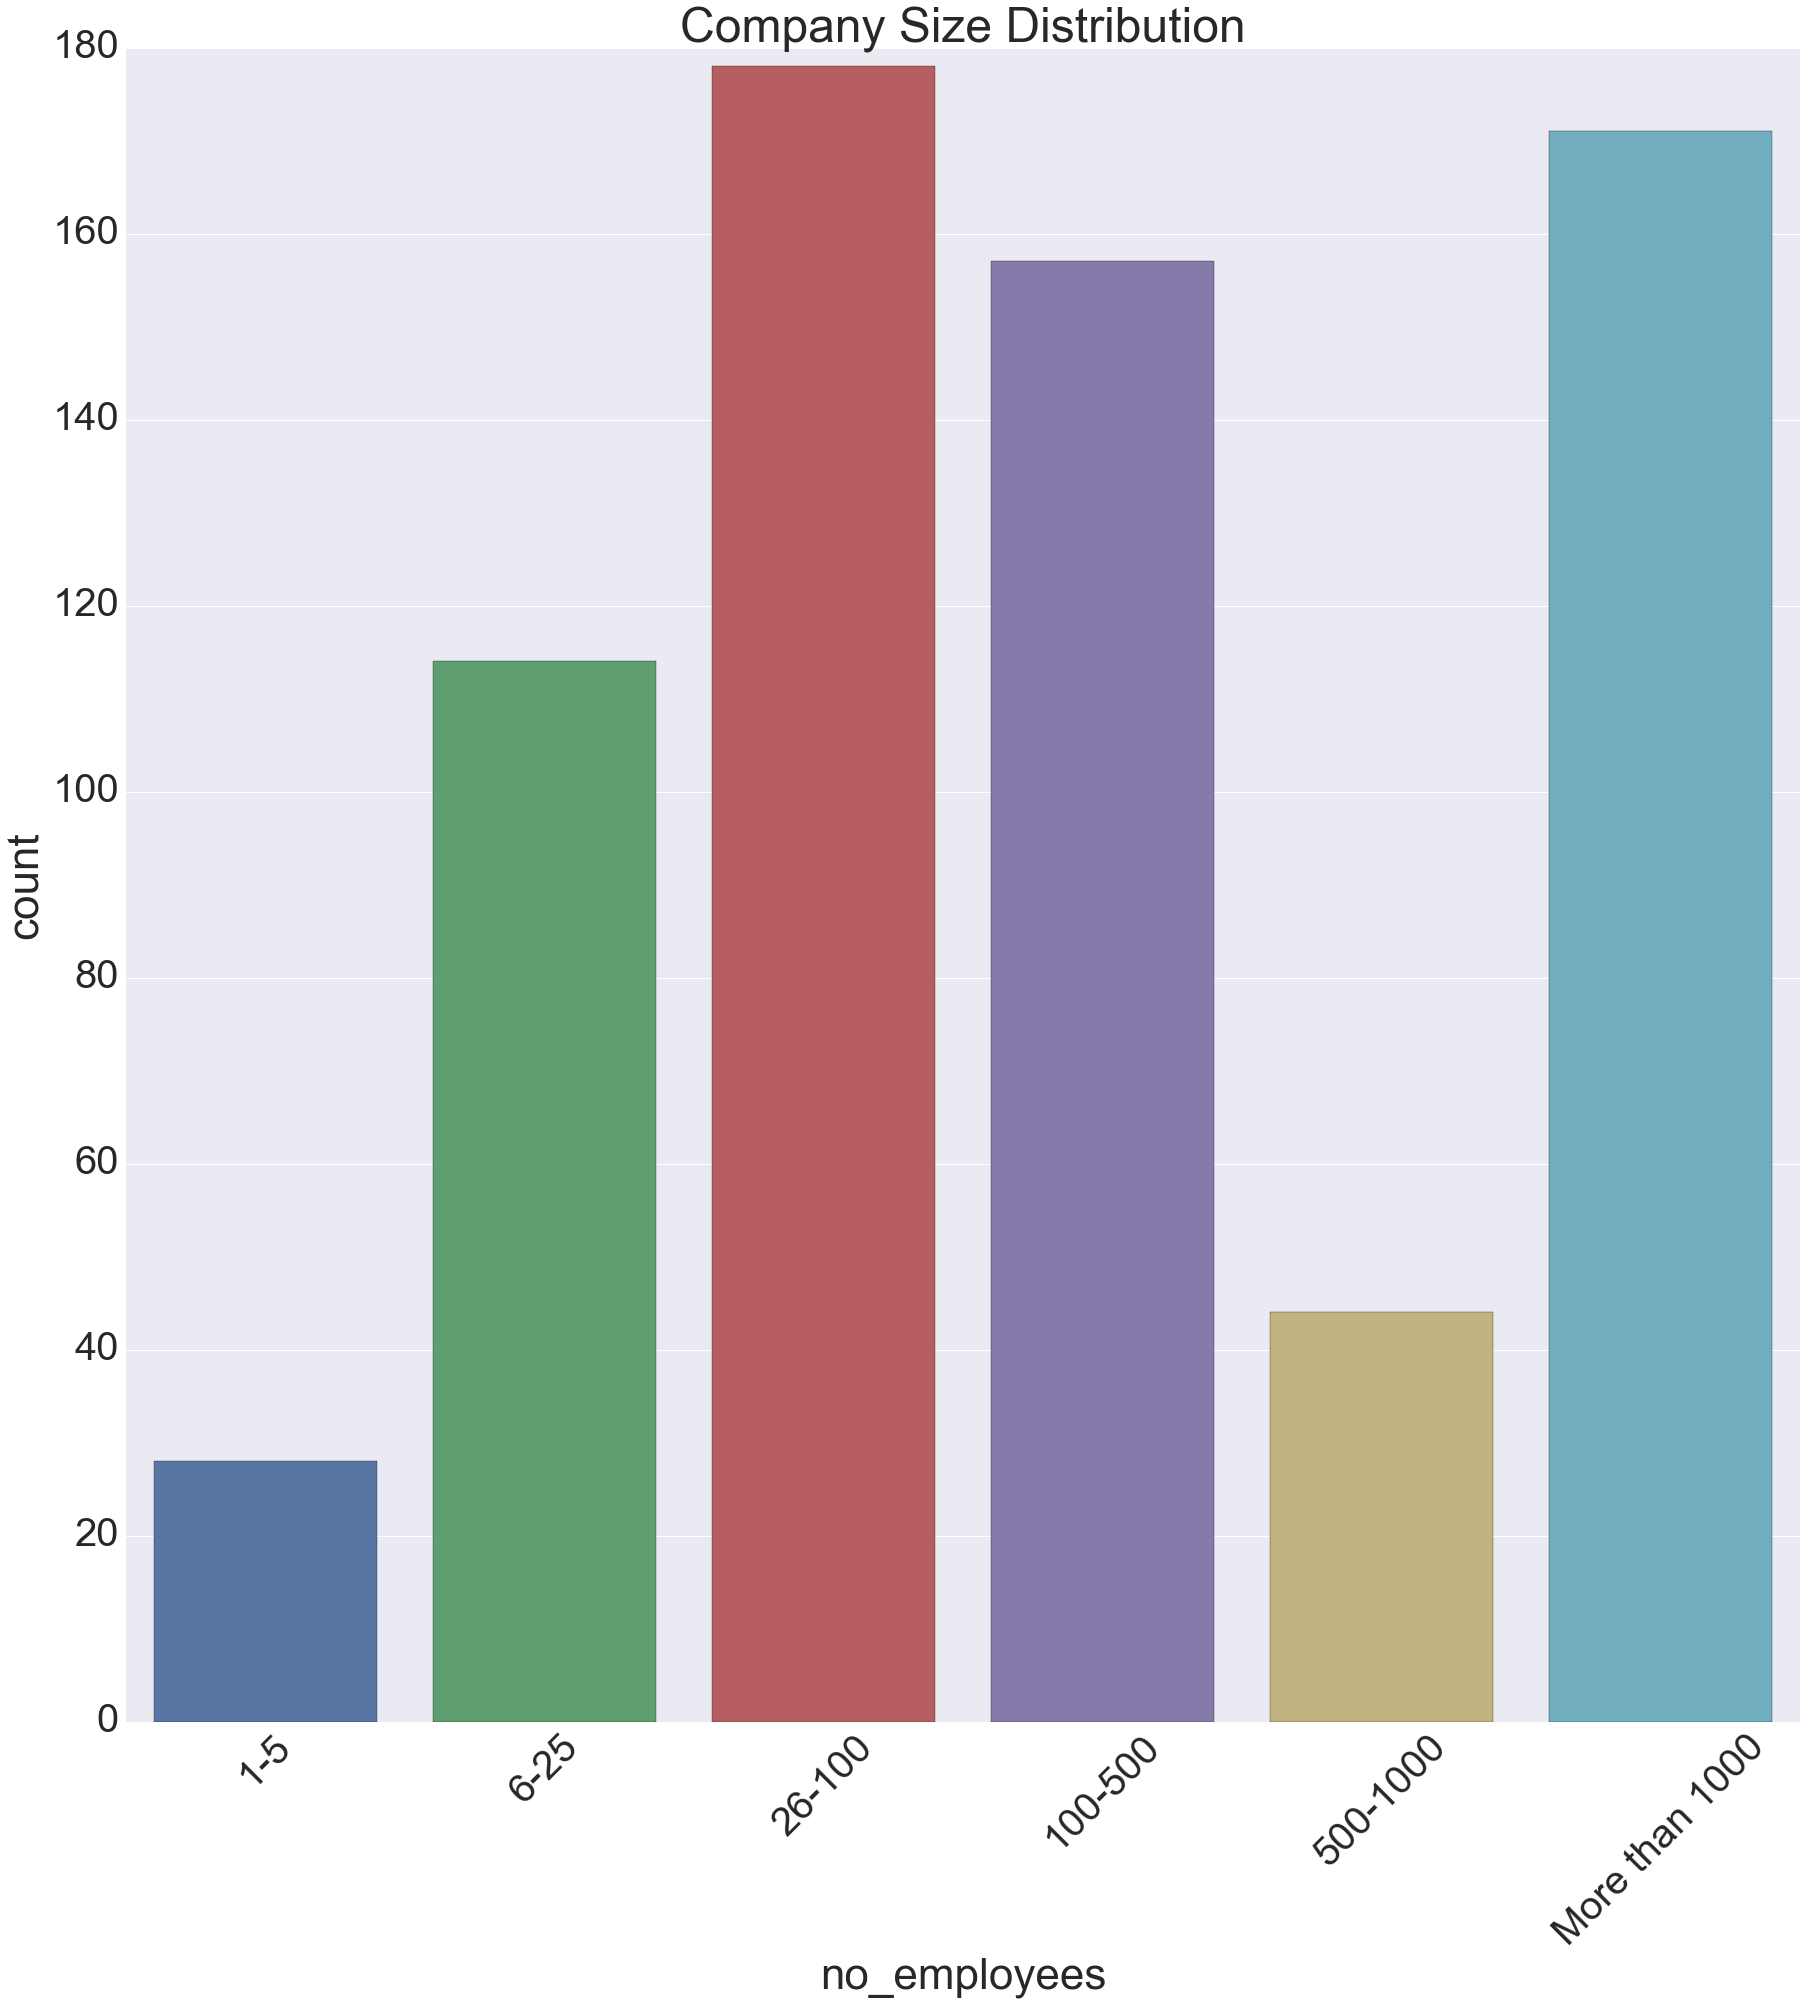

In [28]:
sns.countplot(df['no_employees'], order=['1-5','6-25','26-100', '100-500', '500-1000', 'More than 1000'])
sns.set(font_scale=4)
plt.rcParams['figure.figsize']=(30,30)
plt.title('Company Size Distribution')
plt.xticks(rotation=45)

Although there was a high incidence of mental illness in this sample (2-5x the rate in the general population), a surprisingly high number of respondents said they did have mental health coverage. The ACA mandated mental and substance abuse coverage and several studies showed that many people were not aware of this. However, coverage and knowledge of coverage is high in this sample. 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

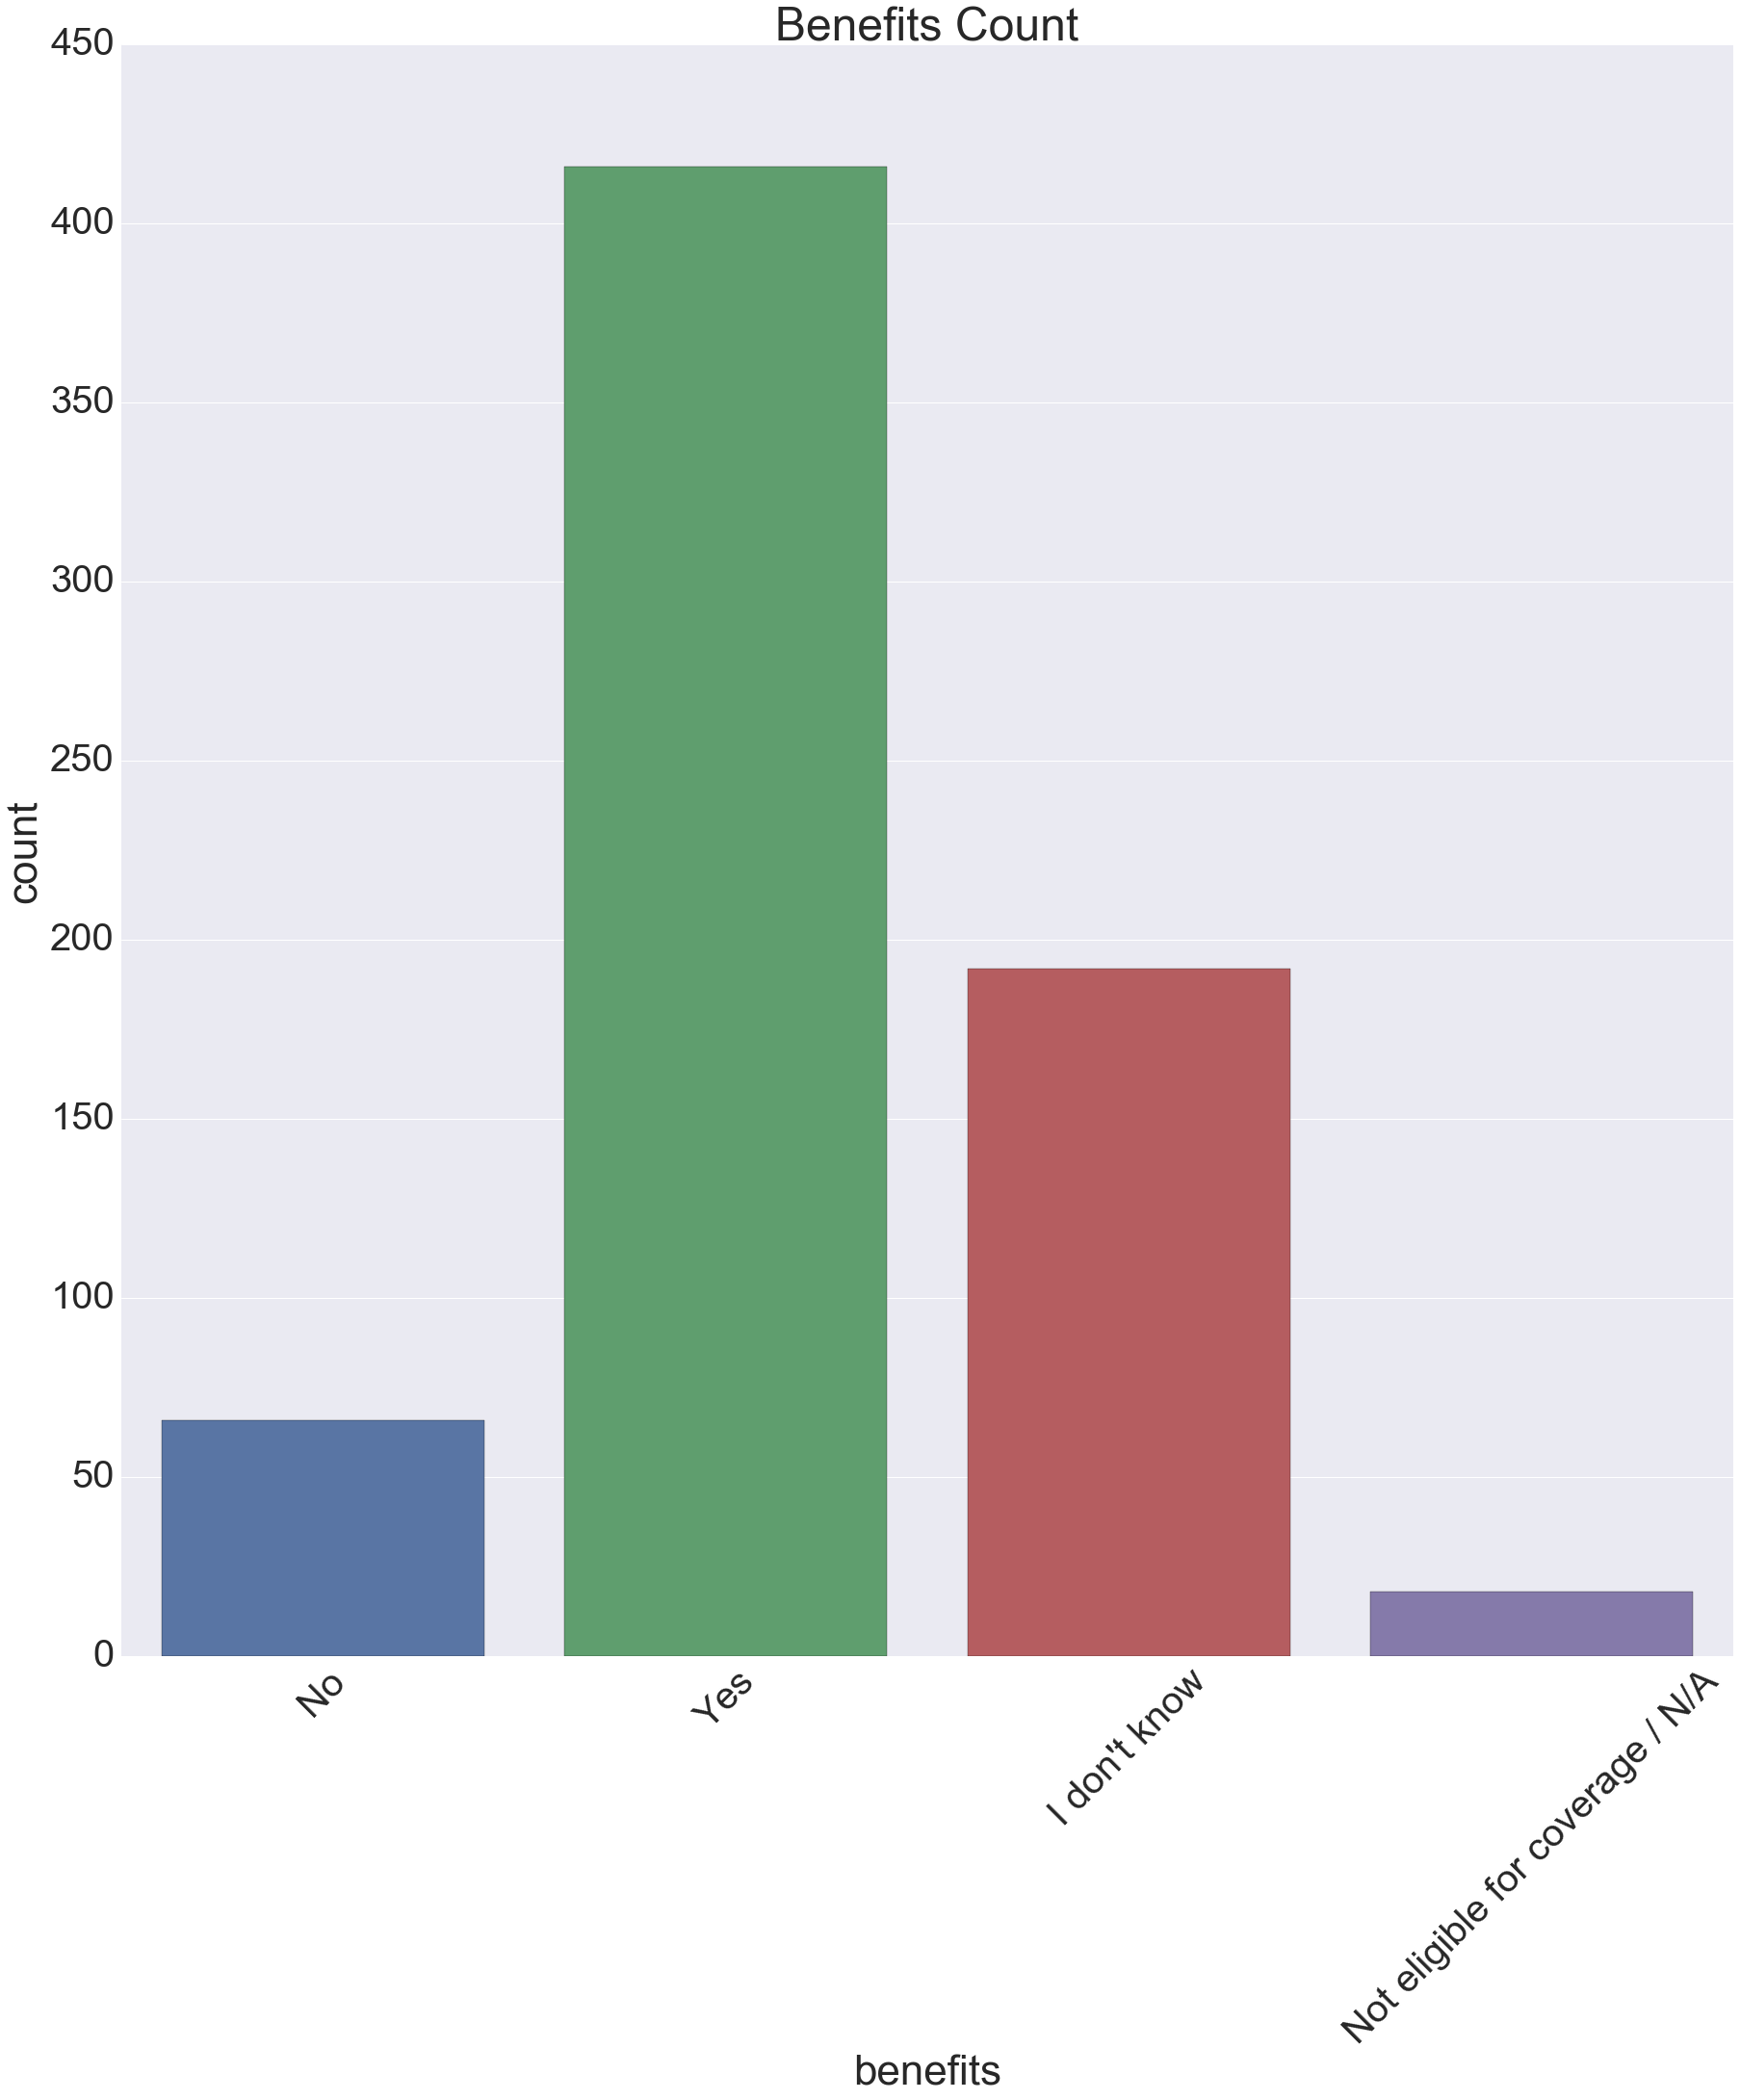

In [29]:
sns.countplot(df['benefits'])
plt.title('Benefits Count')
plt.xticks(rotation=45)

However, the discussion of mental health resources and benefits in workplace wellness programs was very low. 

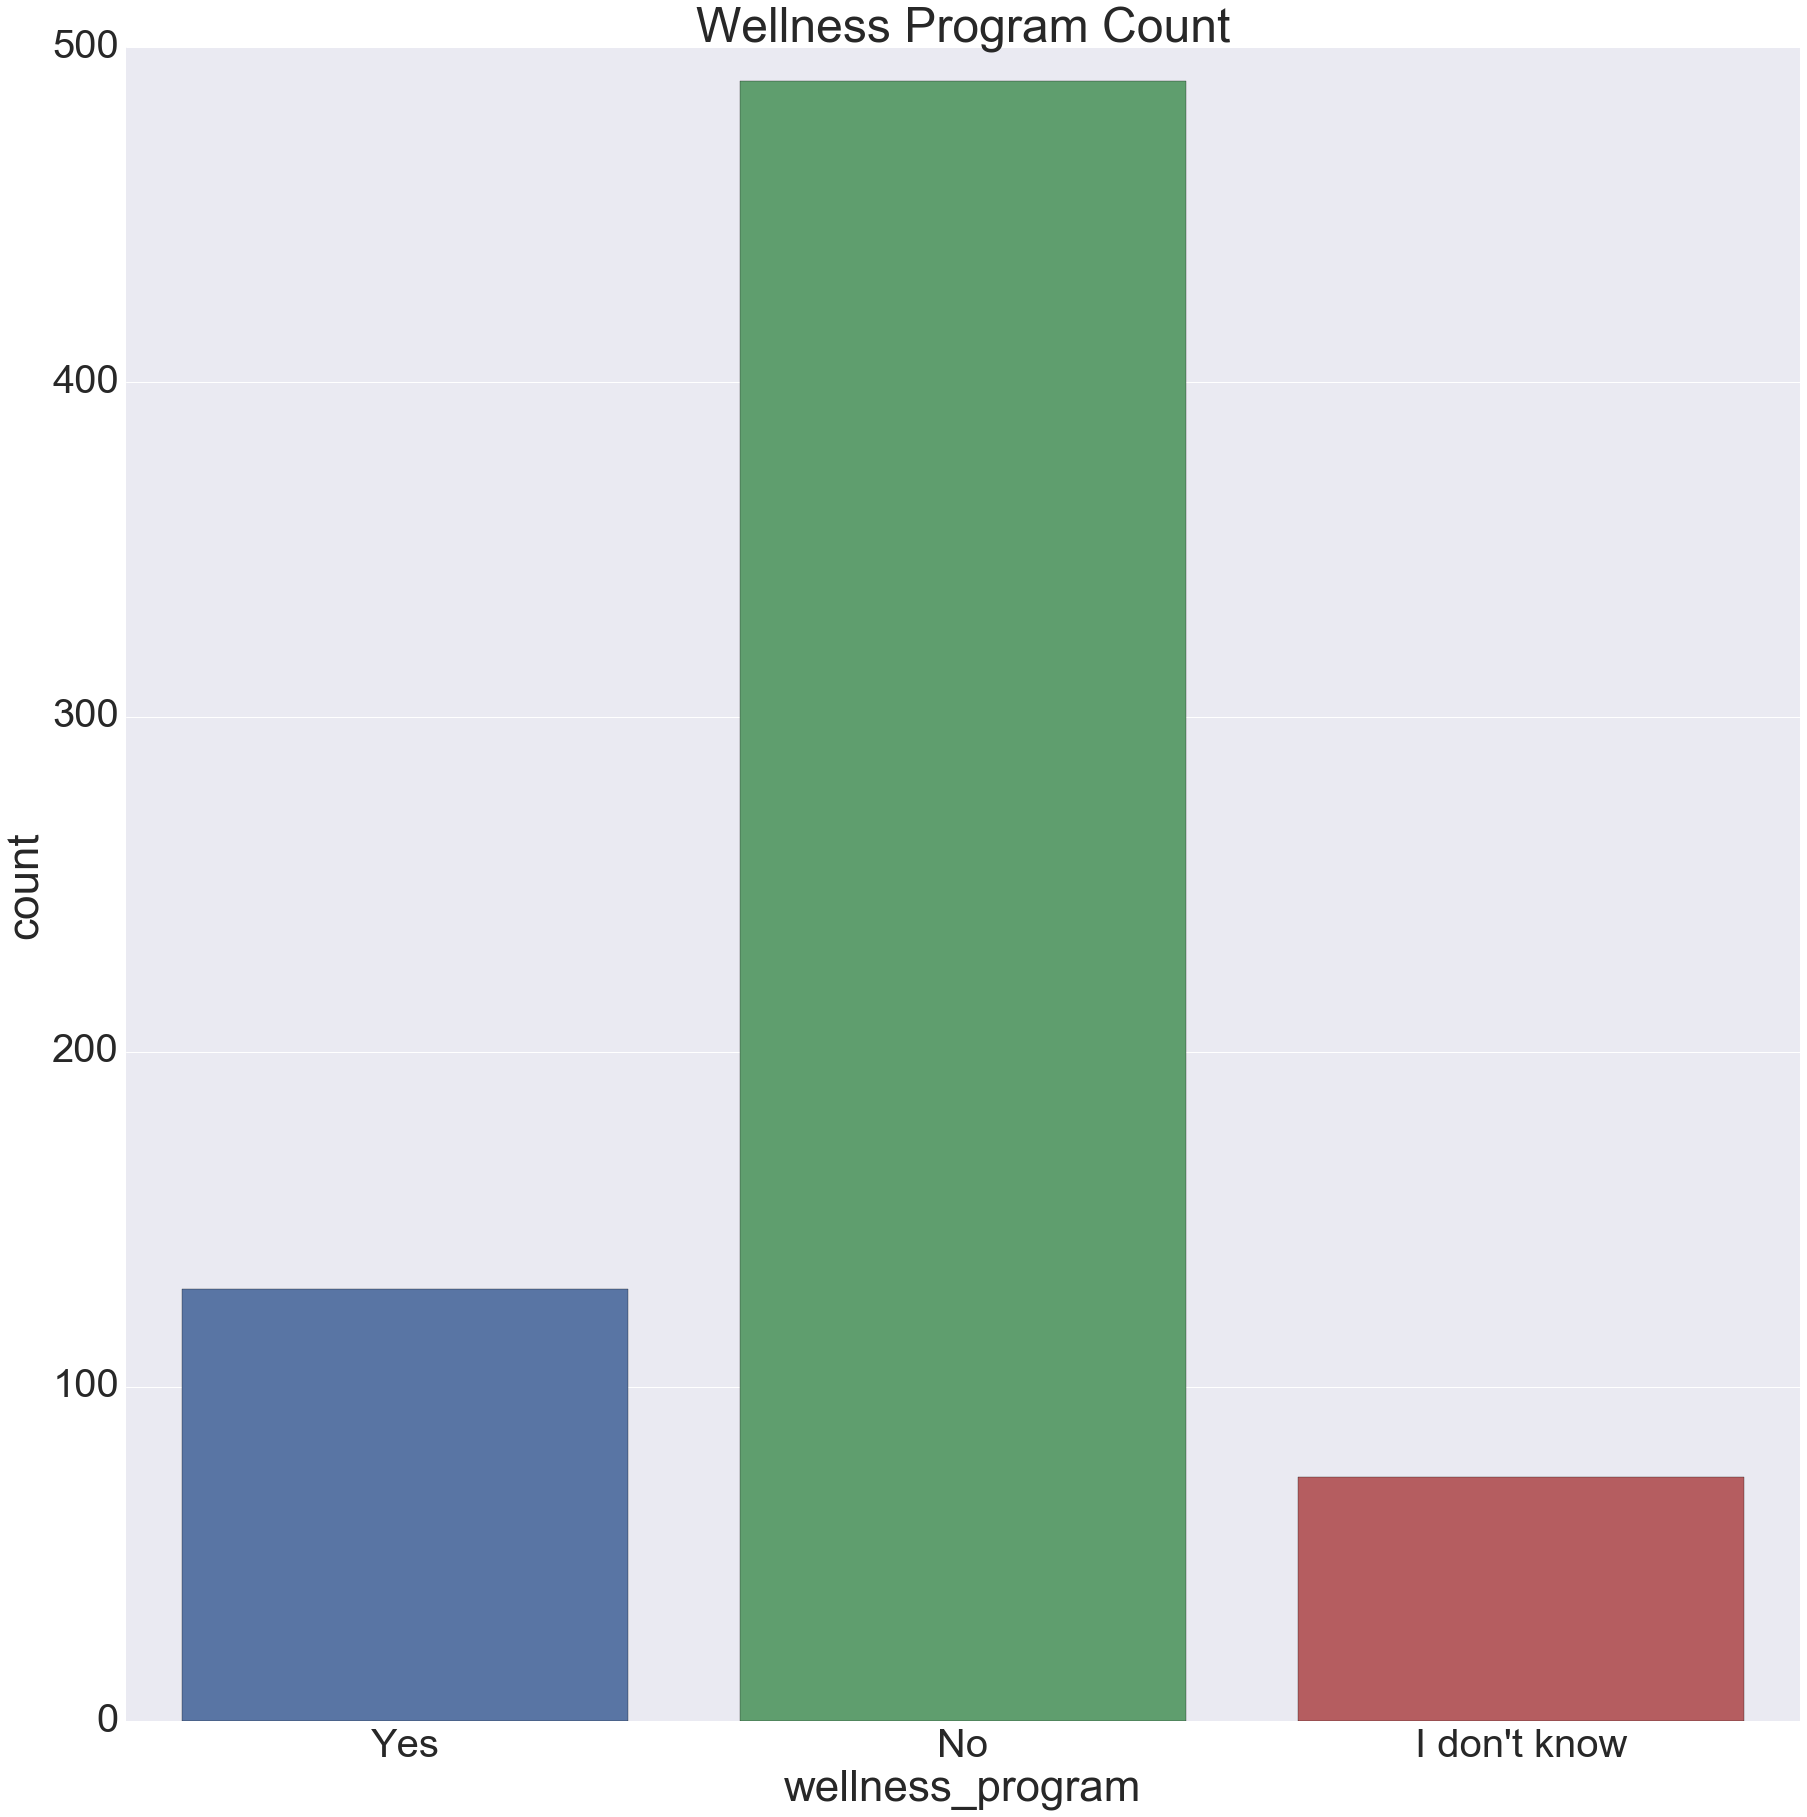

In [30]:
sns.countplot(df['wellness_program'])
plt.title('Wellness Program Count')

Respondents were very evenly split across categories pertaining to whether their employer offered any resources other than health coverage/insurance for dealing with mental health issues. 

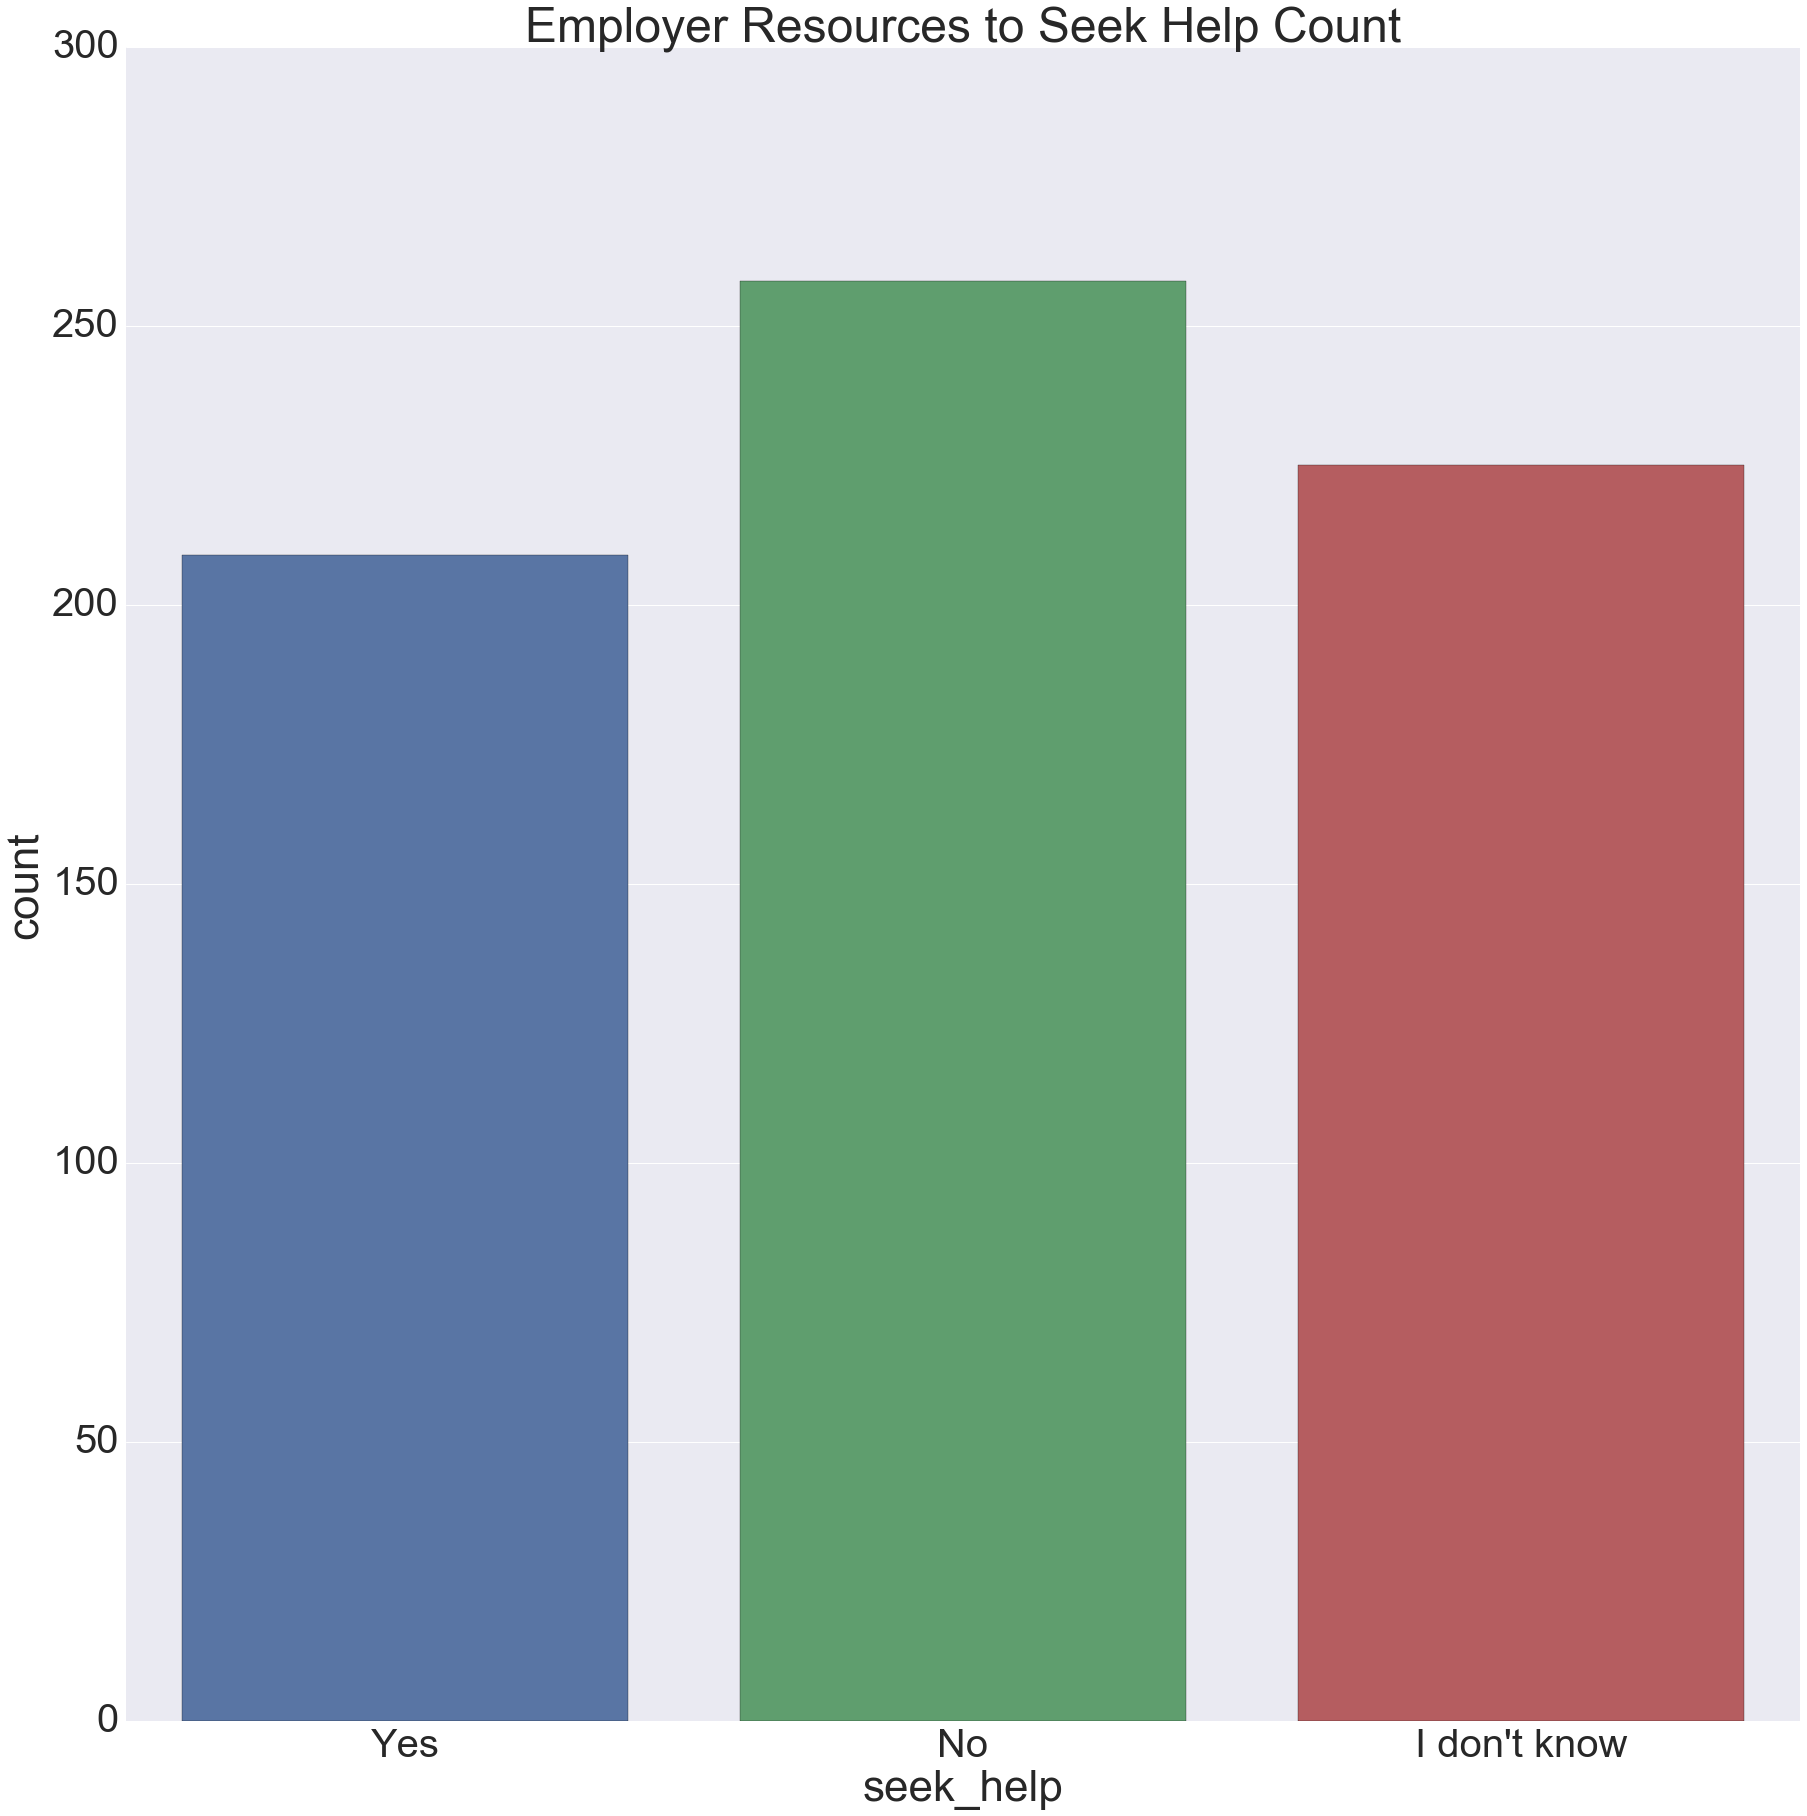

In [31]:
sns.countplot(df['seek_help'])
plt.title('Employer Resources to Seek Help Count')

Furthermore, the majority of people didn't know mental health resources were available in their workplace and/or didn't know if their anonymity would be protected when using them.

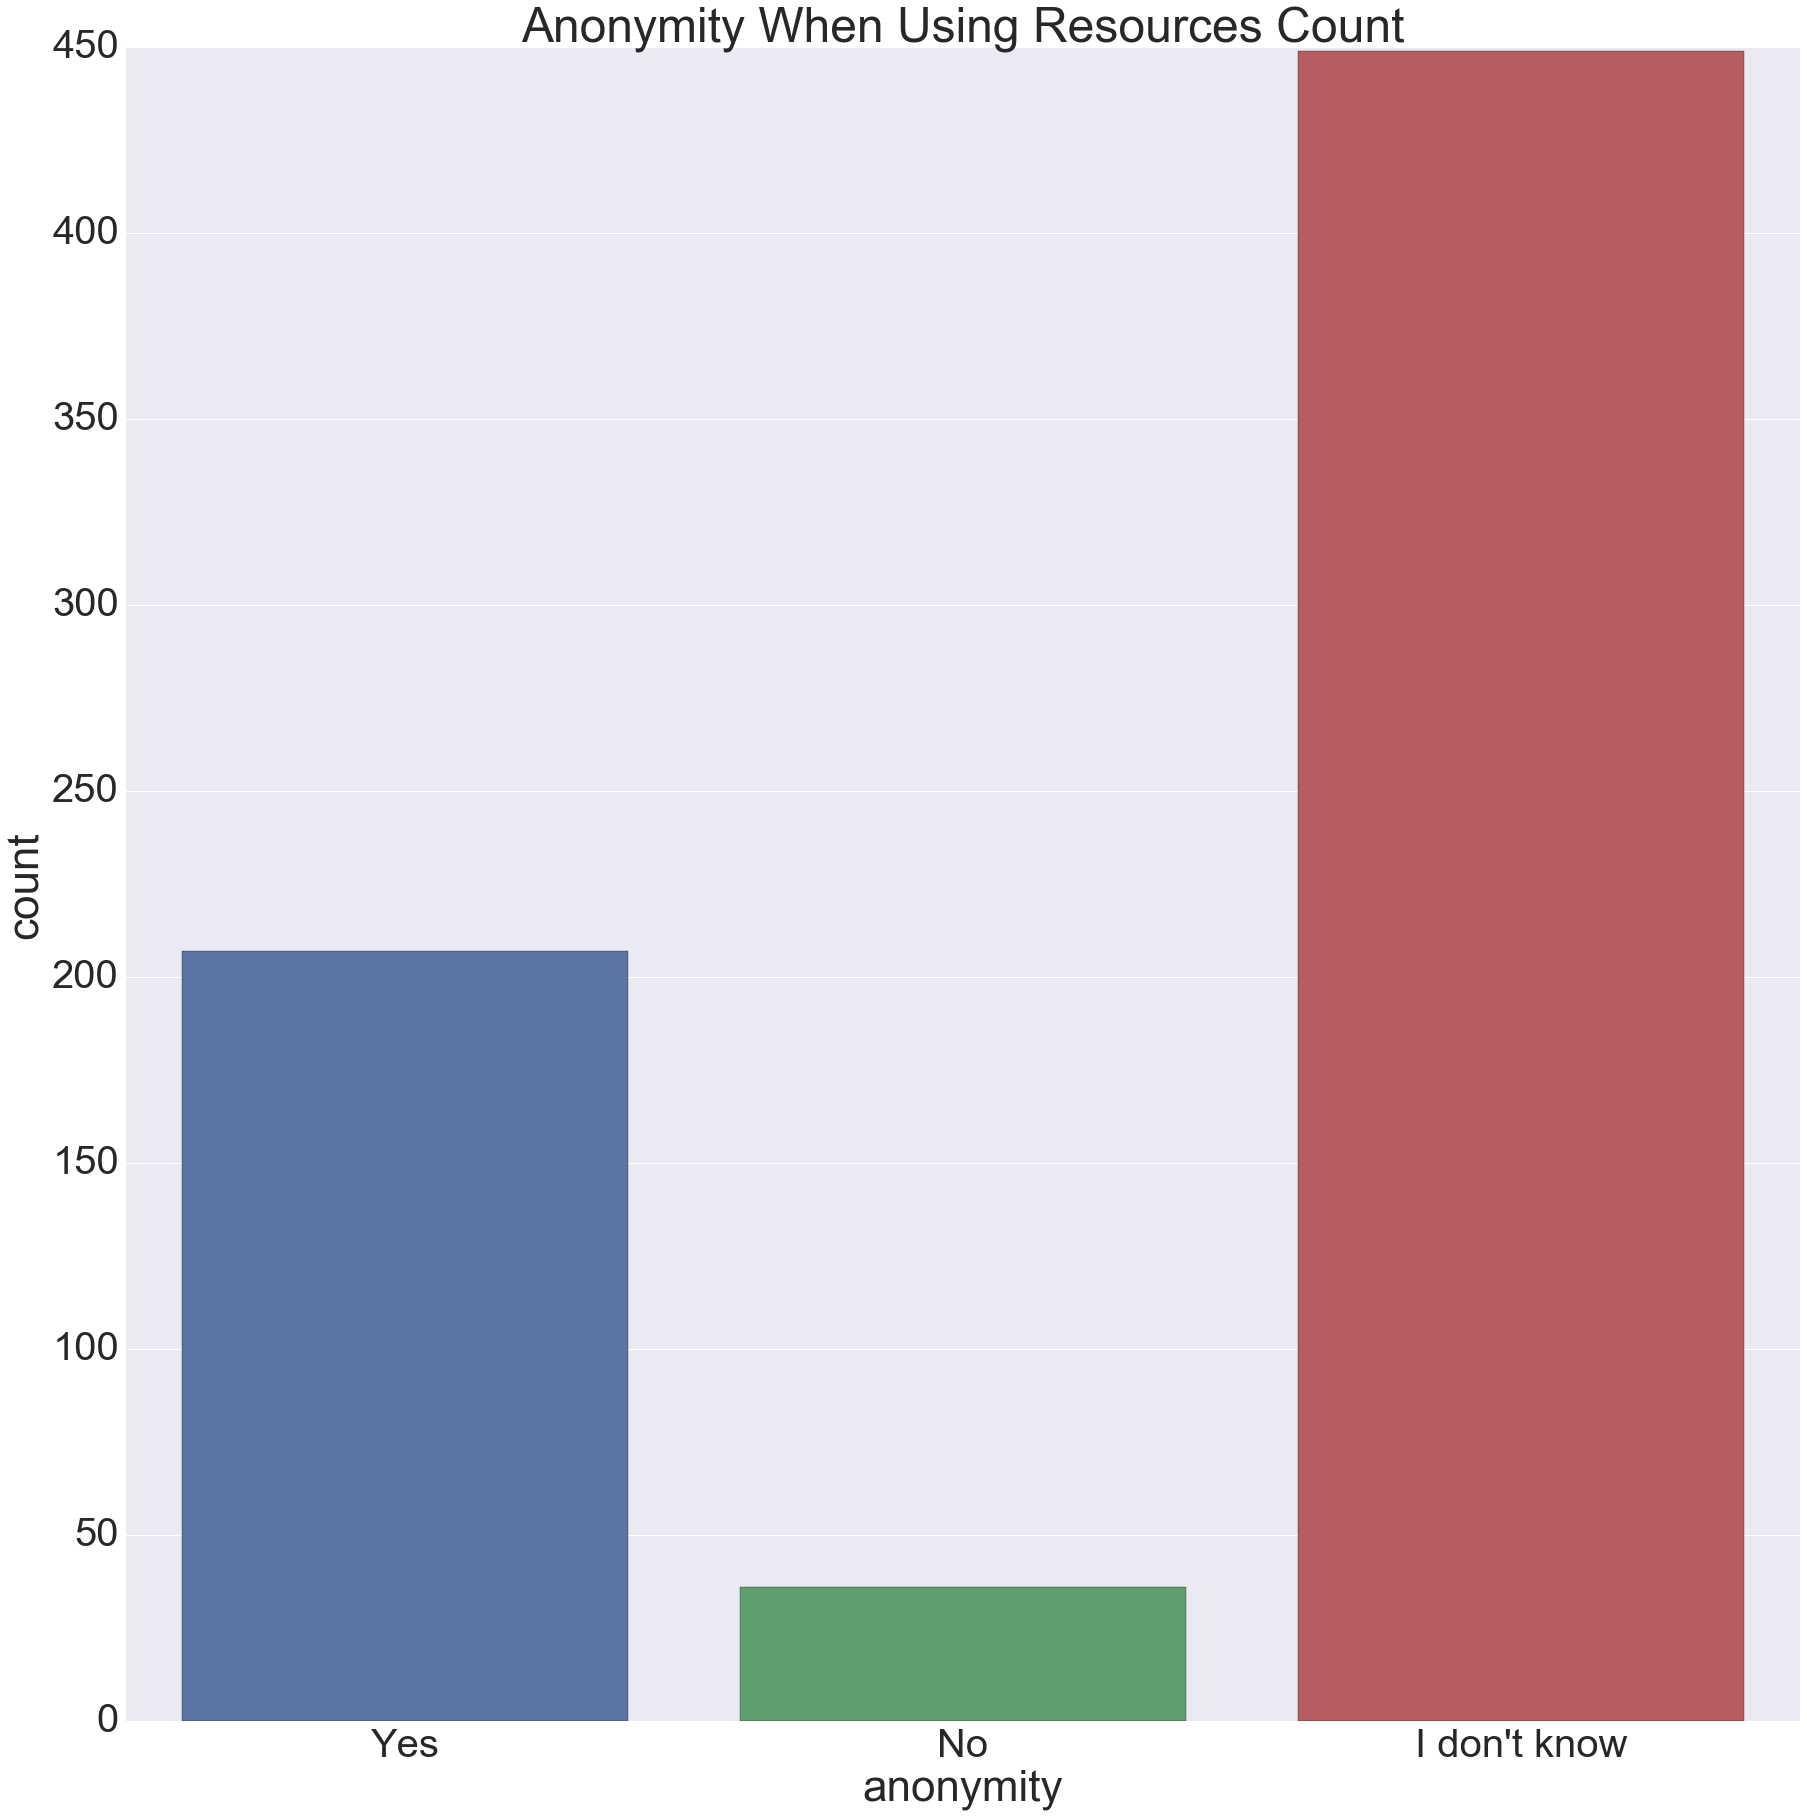

In [32]:
sns.countplot(df['anonymity'])
plt.title('Anonymity When Using Resources Count')

The ease of taking medical leave for mental health issues seemed to be quite variable across this sample.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

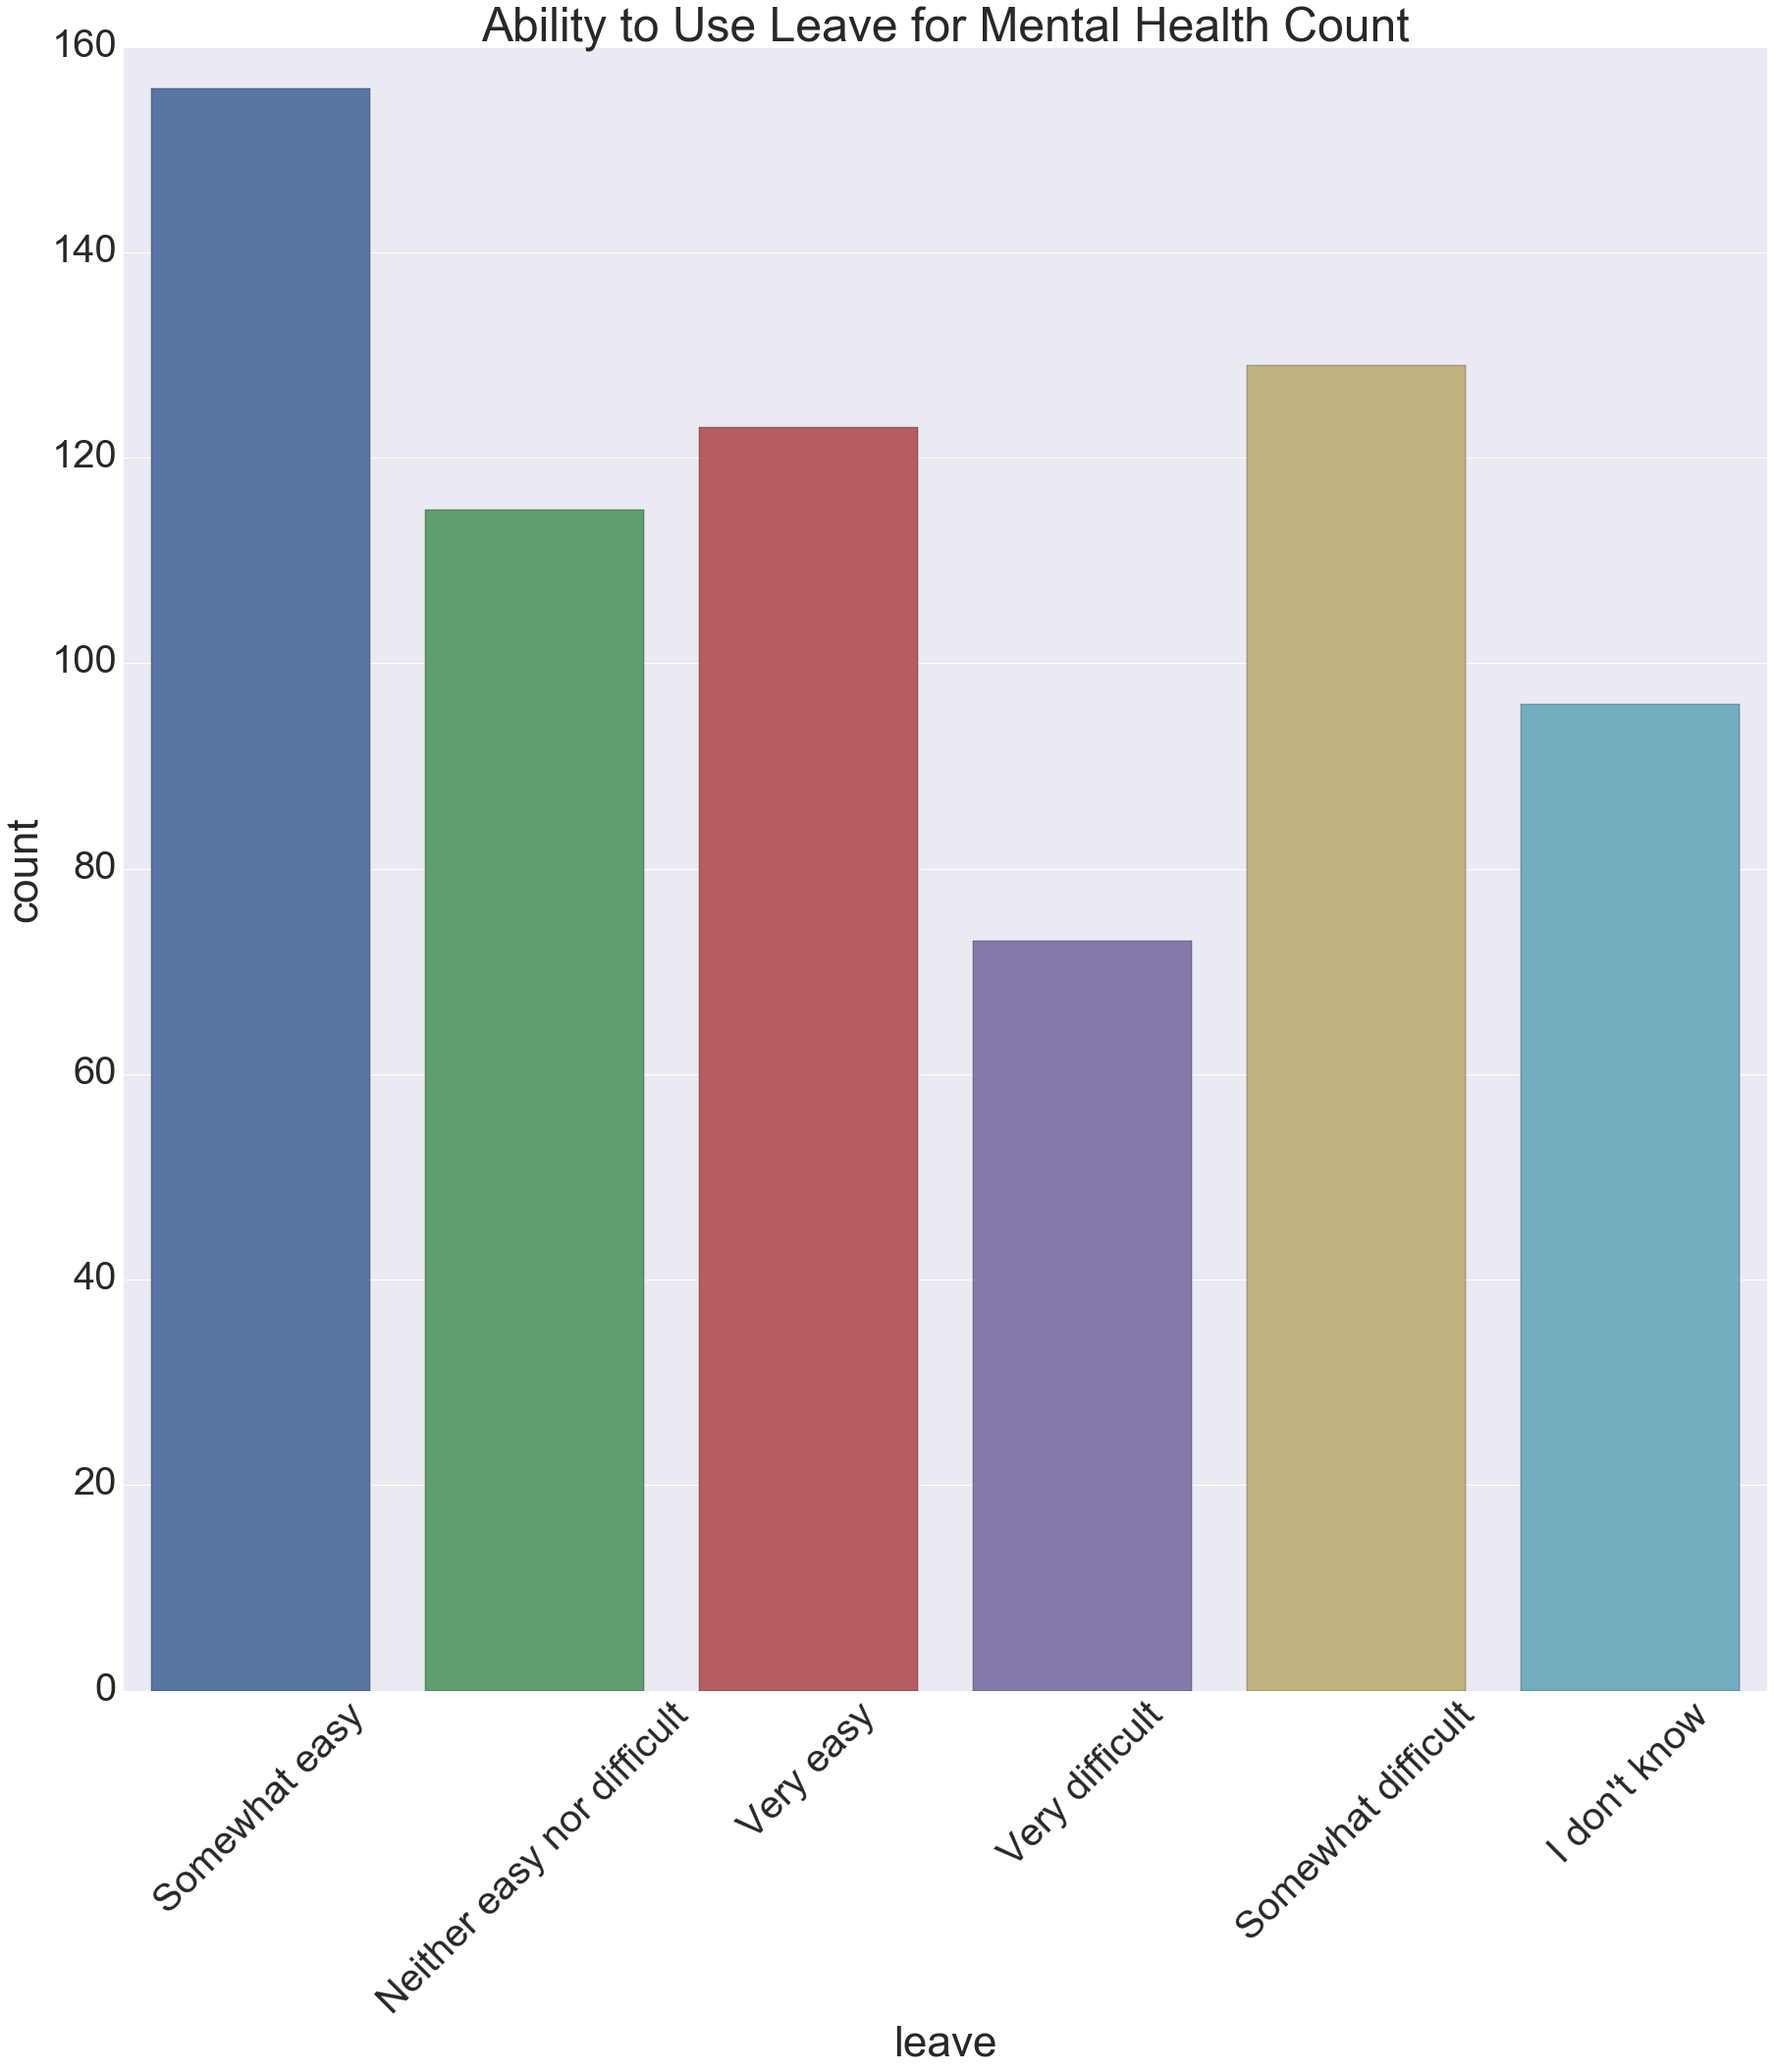

In [33]:
sns.countplot(df['leave'])
plt.title('Ability to Use Leave for Mental Health Count')
plt.xticks(rotation=45)

I included working remotely as a possible factor that could predict current mental illness, because of popular press articles hypothesizing that isolation and interaction with machines rather than people may contribute. Over 75% of tech workers responding to this survey did at least some work remotely.

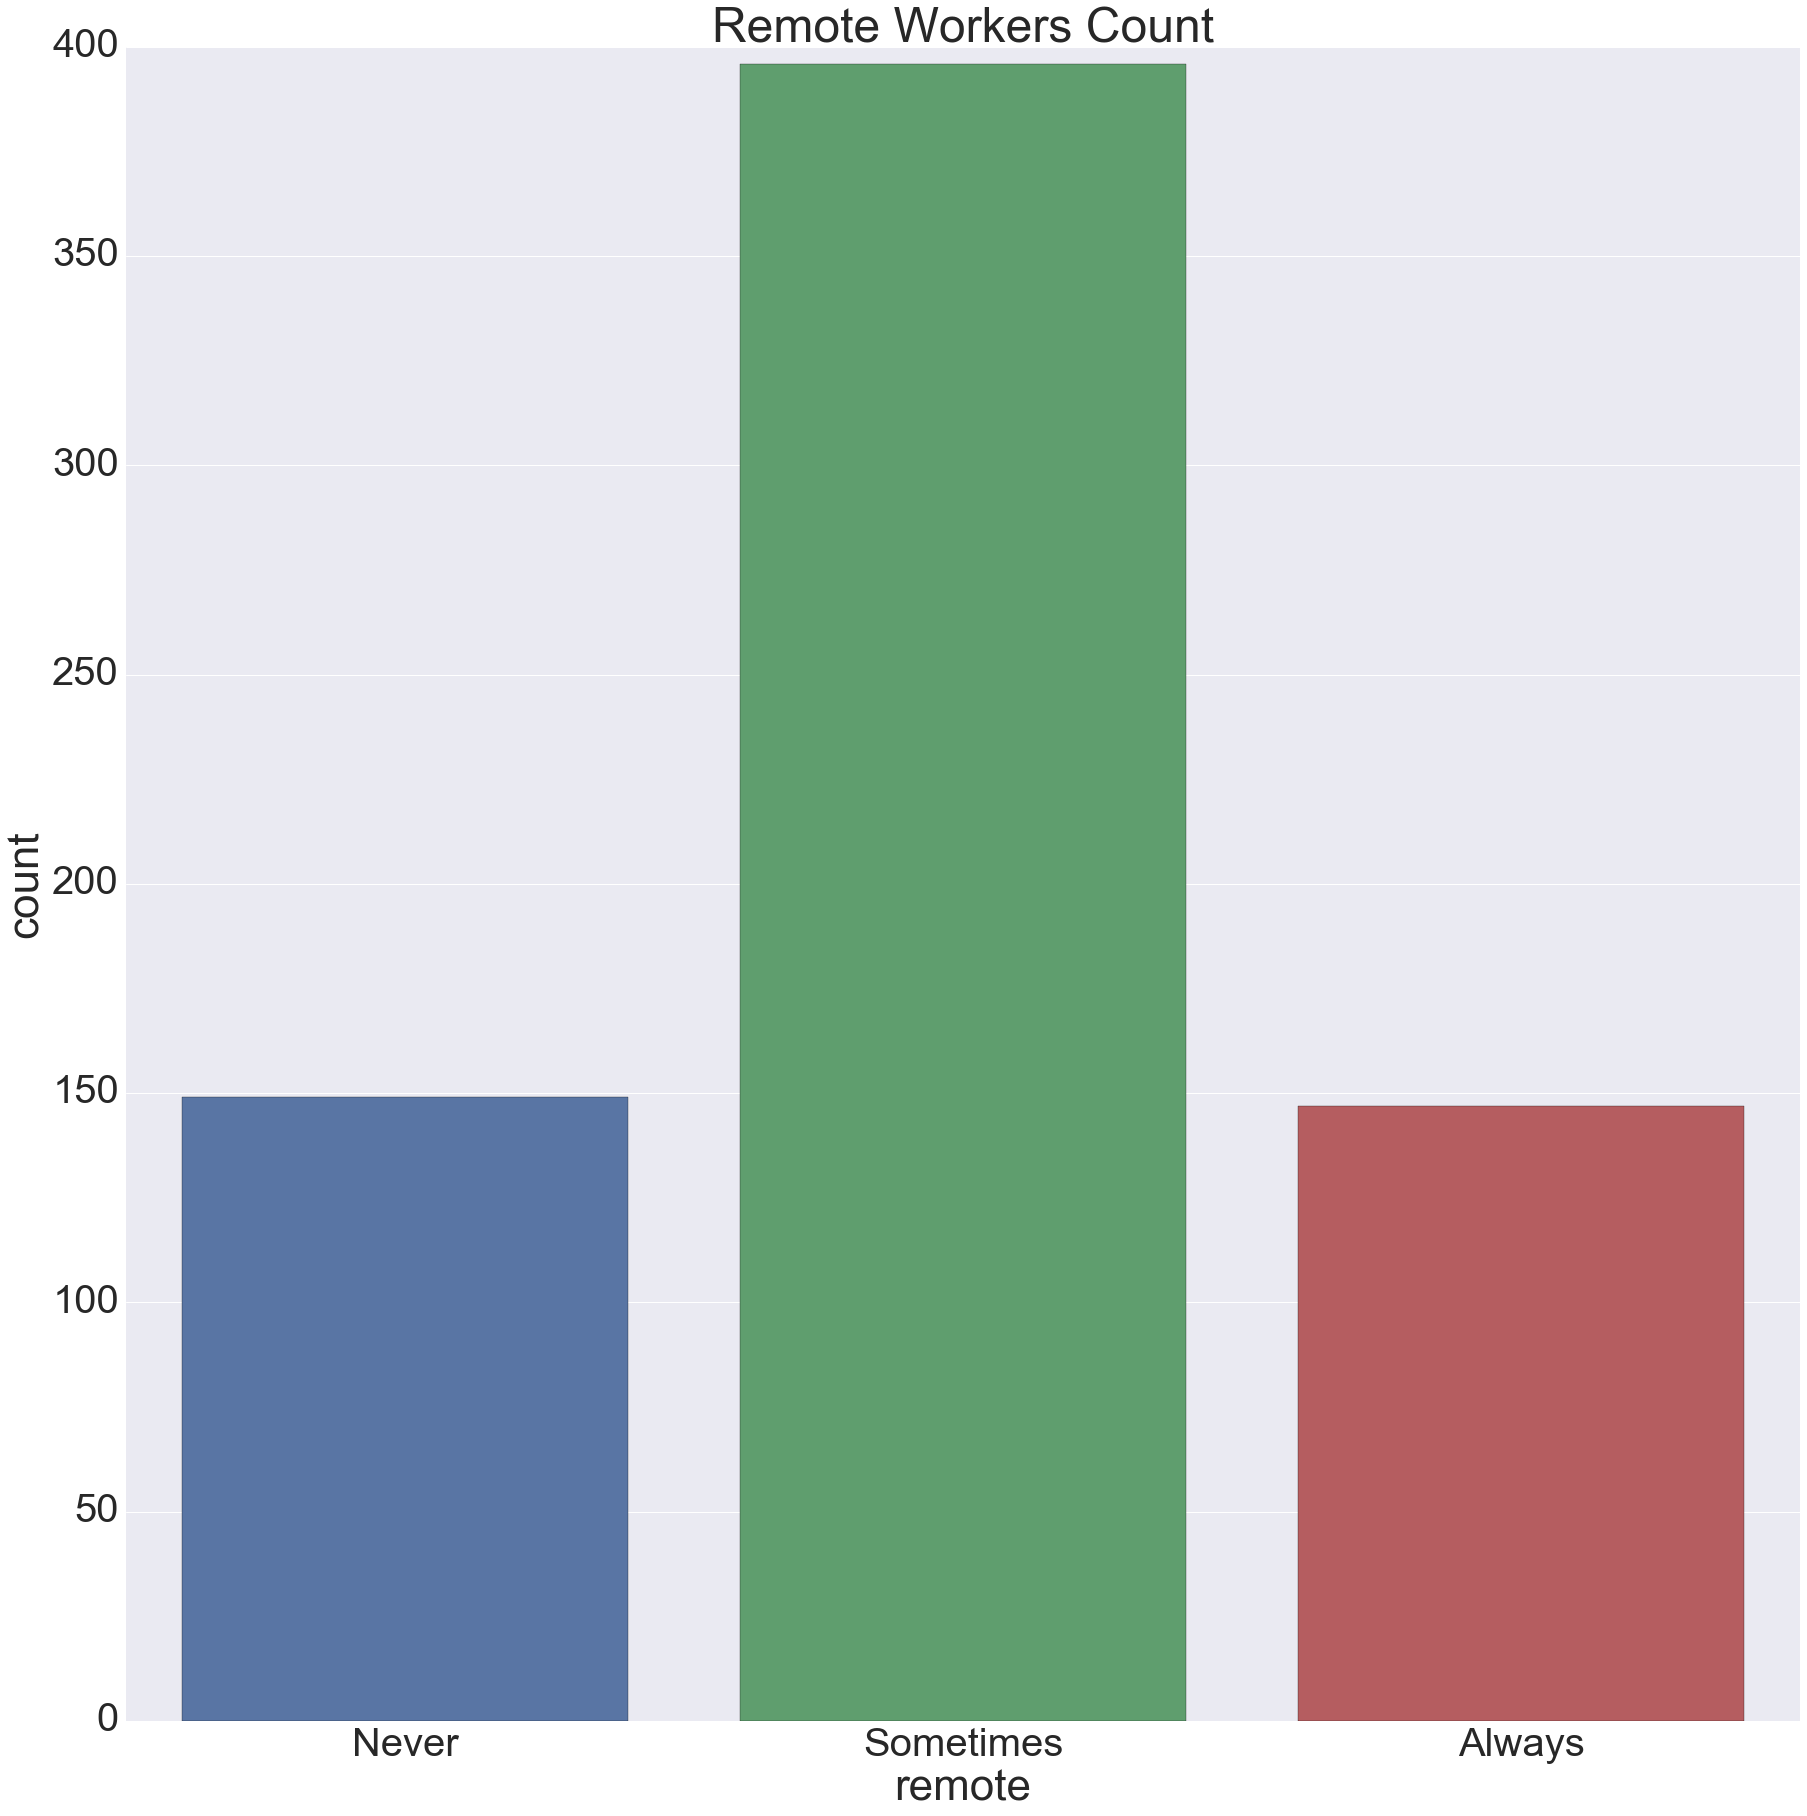

In [34]:
sns.countplot(df['remote'])
plt.title('Remote Workers Count')

Based on my experience in mental health research, I hypothesize that family history may be the most important variable in prediciting current mental illness status. Since the geography and the type of position (not shown here) varied so widely, I hypothesize that genetic and early life environmental contributions may be the strongest link in this particular dataset. 

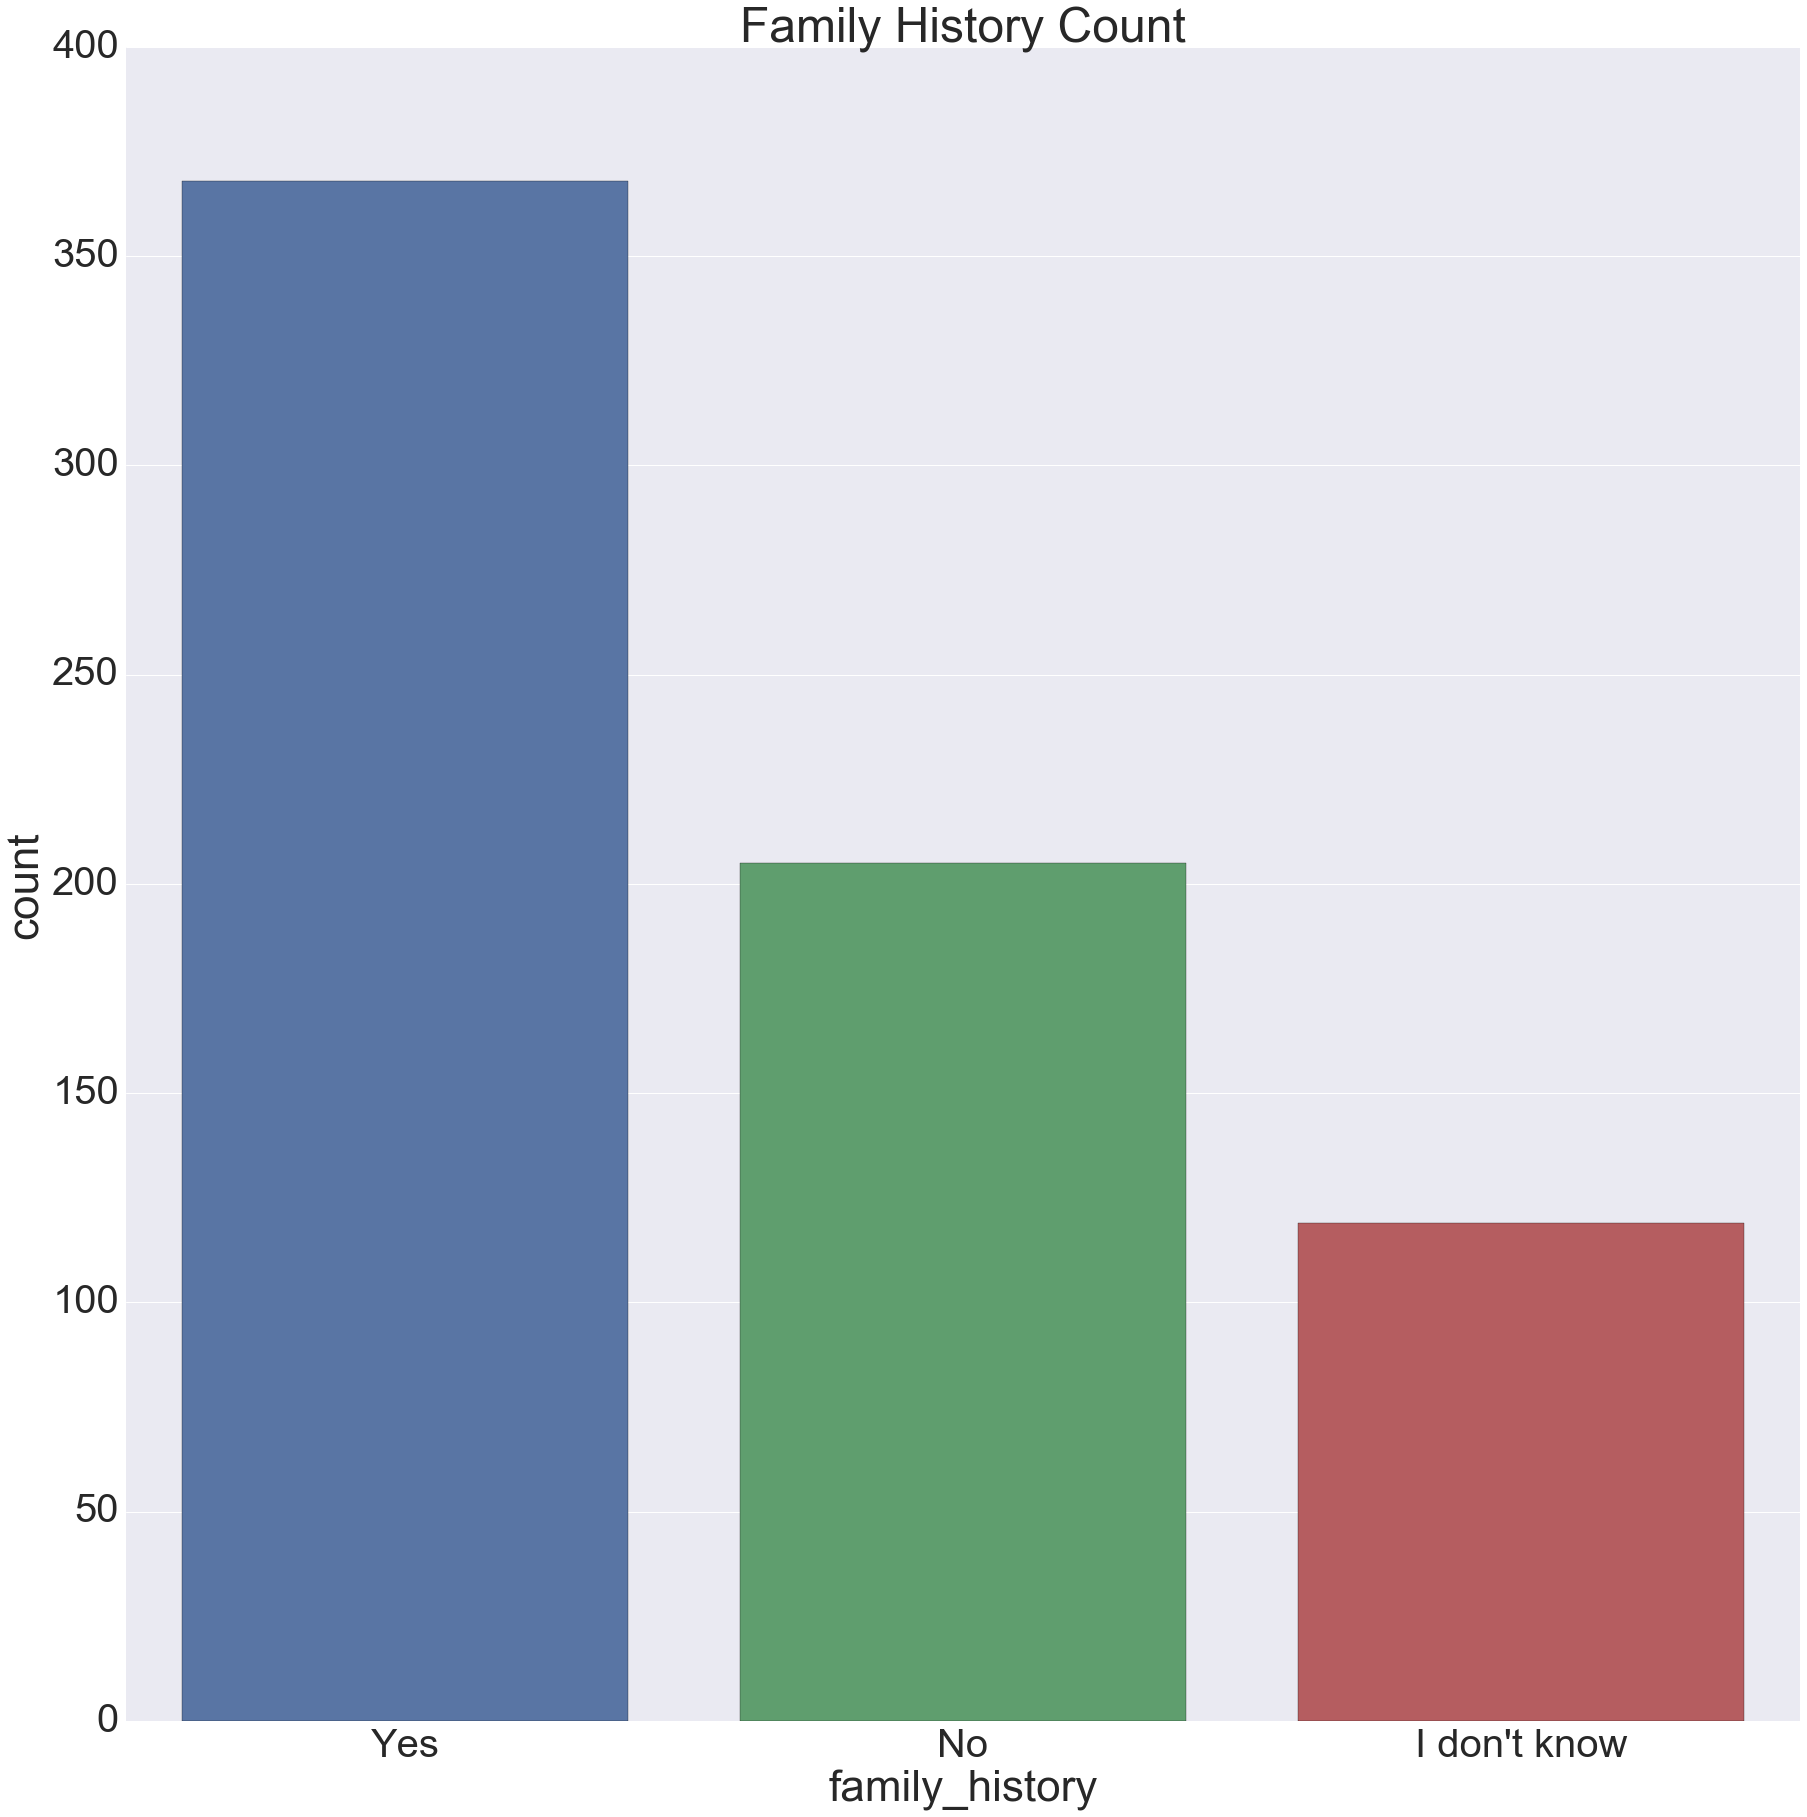

In [35]:
sns.countplot(df['family_history'])
plt.title('Family History Count')

One of the most comprehensive surveys of mental health in the US (The US National Comorbidity Survey) estimated that 18% of working adults had symptoms of a mental health disorder in the previous month. However, in this survey sample the incidence of current disorders is much higher. The reason for this may be a combination of factors, such as self-selection into this survey due to interest in seeing mental health issues addressed more in the workplace, or even that there is a higher prevalence of mental health issues in tech workers. However, since this survey relied on voluntary responses and self-reported data, no conclusions about prevalence can be made here. 

Furthermore, as hypothesized, there is a very high correlation between family history of mental illness and current mental illness. 

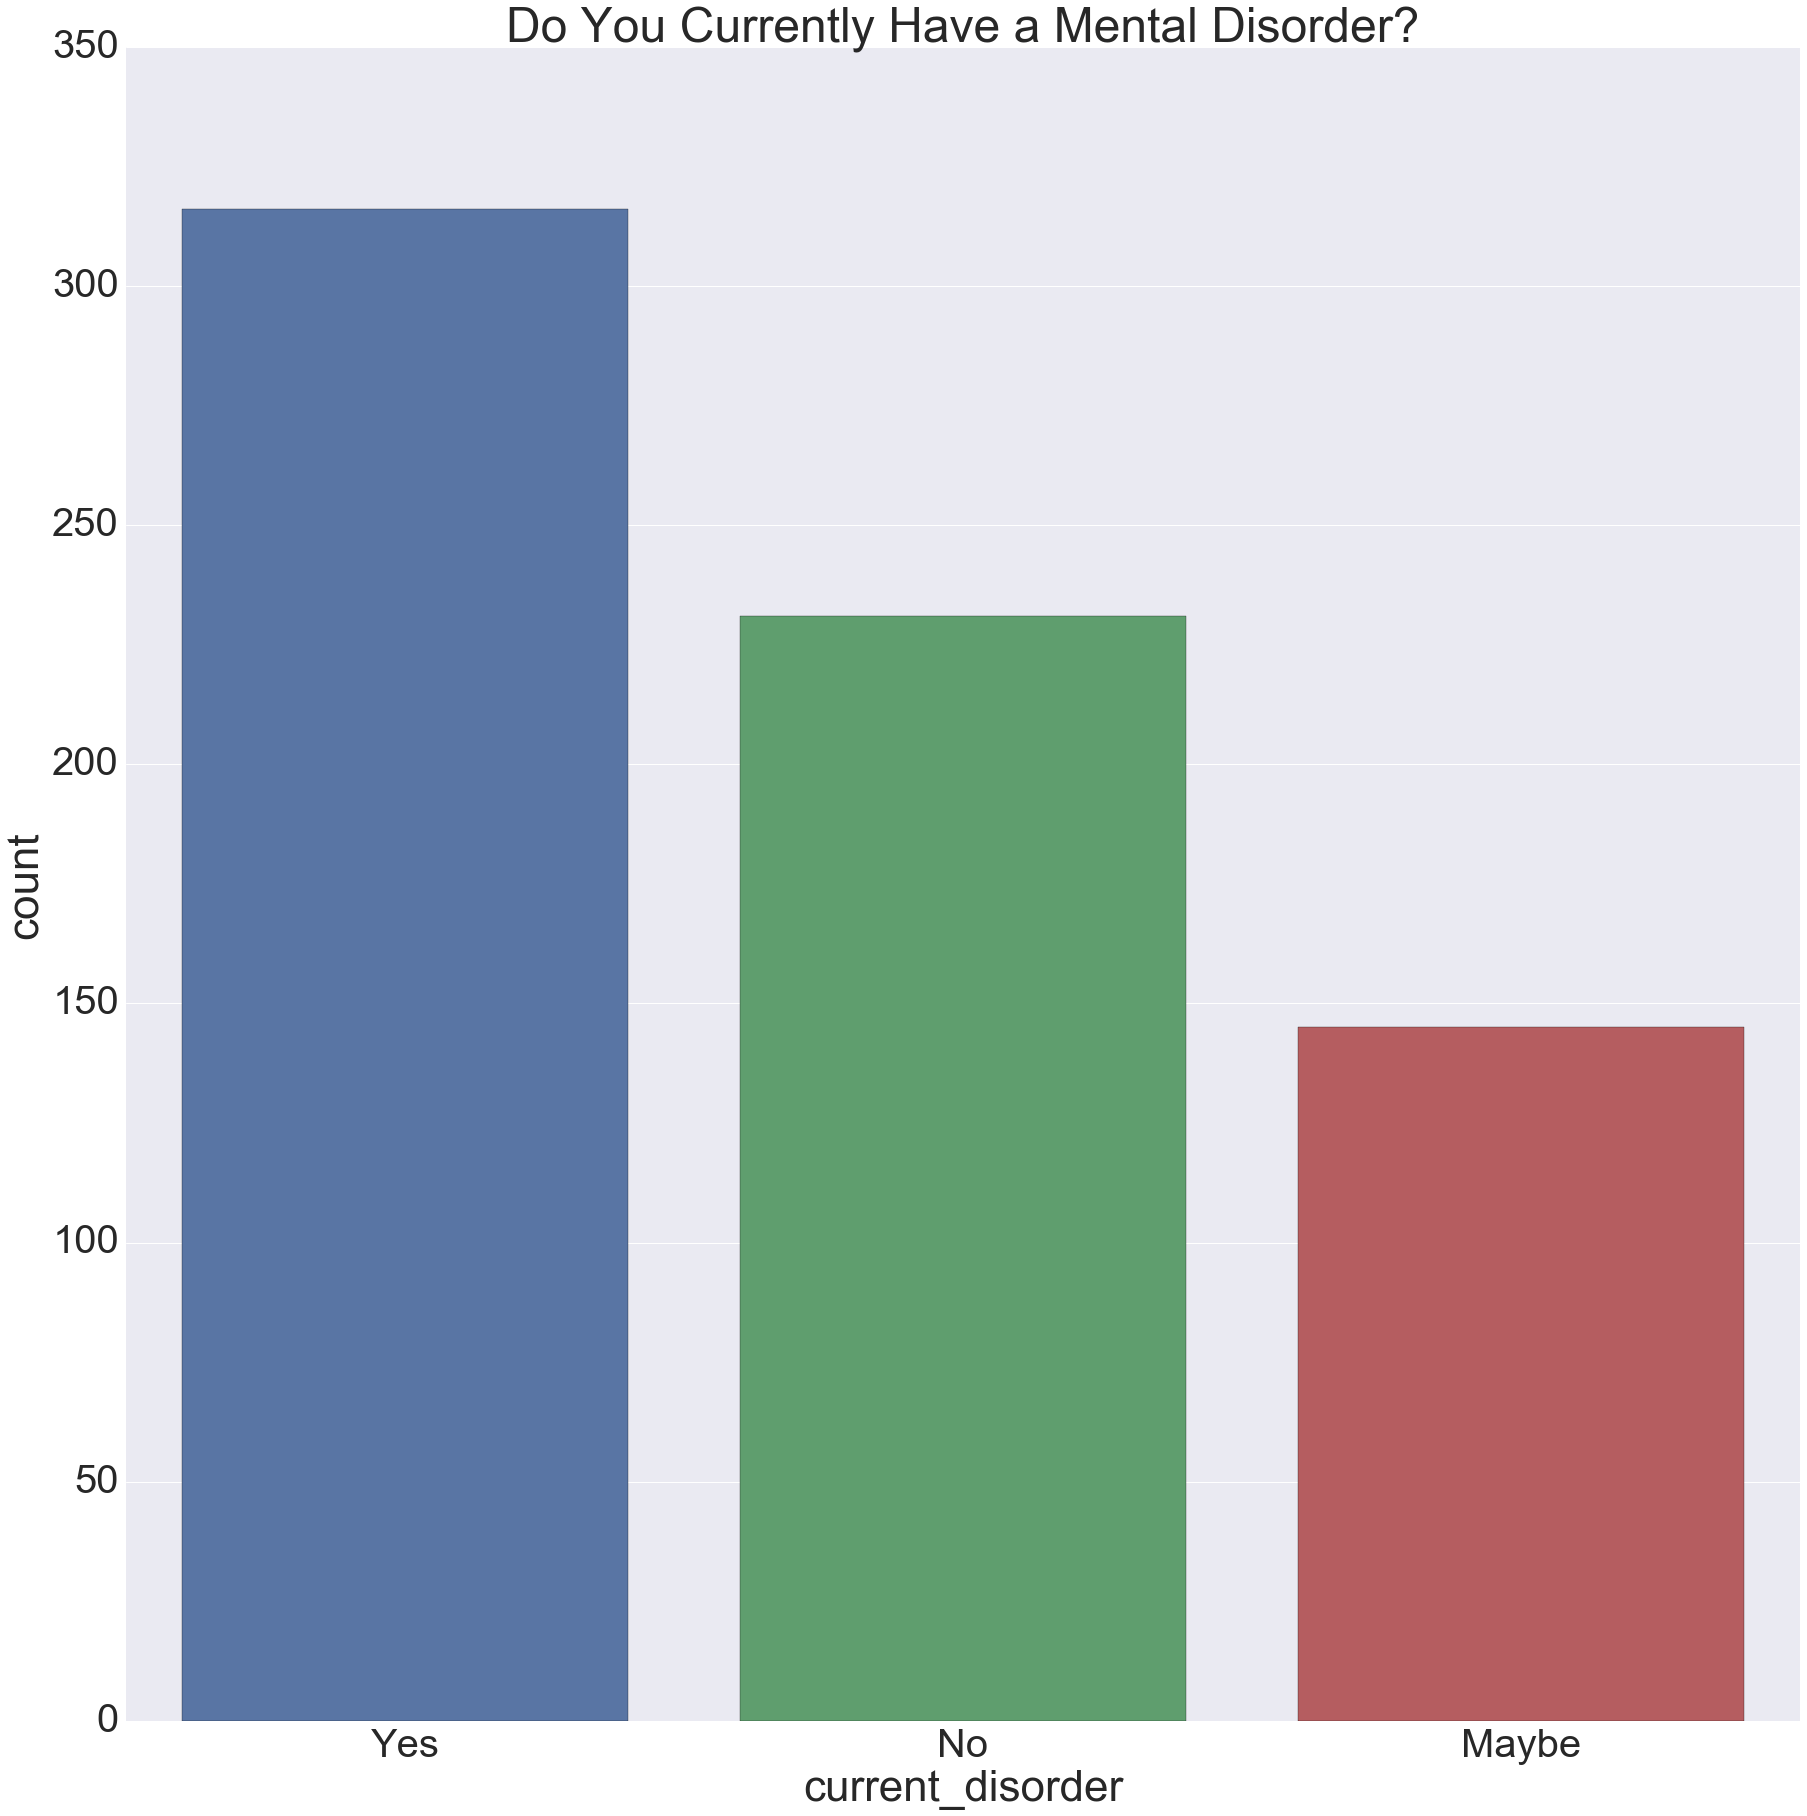

In [36]:
sns.countplot(df['current_disorder'])
plt.title('Do You Currently Have a Mental Disorder?')

In [37]:
# As suspected, there is a strong relationship between family history and current disorder.
pd.crosstab(df.family_history, df.current_disorder)

current_disorder,Maybe,No,Yes
family_history,,,
I don't know,42,33,44
No,34,128,43
Yes,69,70,229


### Insight about data set:

There was a large amount of data here, so I had to make some choices about what to include in my model in the next step. I tried to select categories that had full data available, and that would make sense as possible genetic (family_history) or environmental (for example, access to mental healh care coverage) contributors to having or continuing to have a mental health disorder. I had to leave out nonbinary gender and a lot of data about attitudes towards mental health in the workplace, which I would like to explore in further analyses after this class is over. 